## CPAG Project , 
### Ordinary Kriging Estimation for Bench 880 and Compare The Result to EType Simulation Model
#### Data Used in This Project is from Ad Duwayhi Mine Located in Central of Saudi Arabia they Use Blasthole Samples for Grade Control @ 5 meter composite Samples 
<img src="Blasthole_data_image.jpg">

In [2]:
import pandas as pd
import numpy as np
import pygeostat as gs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from IPython.display import display, Math, Latex
from IPython.display import Image
from DisplayPostscriptInJupyter import *
import warnings
import math
from tqdm.notebook import tqdm_notebook
from time import sleep
from tqdm import tqdm
import os
import sys
import seaborn as sns
import matplotlib as mpl
import cmocean 
import time

warnings.filterwarnings('ignore')
%autosave 60
%matplotlib inline

print (' ')
print ('The versions of the python packages are given as follows:')
print (' ')
print ('Numpy version     :', np.__version__)
print ('Pandas version    :', pd.__version__)
print ('Pygeostat version :', gs.__version__)
print ('Python version    :', sys.version_info)

Autosaving every 60 seconds
 
The versions of the python packages are given as follows:
 
Numpy version     : 1.23.5
Pandas version    : 1.5.3
Pygeostat version : 1.1.1
Python version    : sys.version_info(major=3, minor=10, micro=9, releaselevel='final', serial=0)


In [3]:
pd.set_option ('display.max_columns', 700)
pd.set_option ('display.max_rows', 400)
pd.set_option ('display.min_rows', 10)
pd.set_option ('display.expand_frame_repr', True)

In [4]:
plt.rcParams ['figure.figsize'] = (5.0, 5.0)
plt.style.use('seaborn-dark-palette')
plt.rcParams ['axes.grid'] = True
plt.rcParams ["patch.force_edgecolor"] = True
sns.set()

In [5]:
gs.Parameters['config.getpar'] = True
gs.Parameters['plotting.sigfigs'] = 2
gs.Parameters['plotting.histogram_plot.histbins'] = 20
gs.PlotStyle ['xtick.labelsize'] = 12
gs.PlotStyle ['ytick.labelsize'] = 12
gs.PlotStyle ['axes.labelsize'] = 11

In [6]:
print ('---------------------------------------------------------- ')
print ('The working directory for this study is given as follows:')
print ('----------------------------------------------------------- ')
print (' ')
print (os.getcwd ())

---------------------------------------------------------- 
The working directory for this study is given as follows:
----------------------------------------------------------- 
 
C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE


In [7]:
os.chdir(r'C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE')
print ('------------------------------------------------------------- ')
print ('The new working directory for this study is given as follows:')
print ('------------------------------------------------------------- ')
print (' ')
print (os.getcwd ())

------------------------------------------------------------- 
The new working directory for this study is given as follows:
------------------------------------------------------------- 
 
C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE


In [8]:
datadir = 'datafiles/'
exedir = './exes/'
outdir = 'output/'
gs.mkdir = (outdir)

In [9]:
b_880 = gs.DataFile (datadir +'gold_b880.csv', dh= 'bh', x = 'x', y = 'y', z = 'z', fltype = 'csv')
b_880.head(10)

bh          x           y      z     au
0   1.0  322451.28  2465152.40  877.5  0.084
1   2.0  322453.46  2465150.29  877.5  0.103
2   3.0  322455.54  2465148.16  877.5  0.044
3   4.0  322457.66  2465146.03  877.5  0.096
4   5.0  322406.75  2465090.89  877.5  0.321
5   6.0  322440.37  2465156.00  877.5  0.240
6   7.0  322441.40  2465155.24  877.5  0.323
7   8.0  322443.55  2465153.14  877.5  0.045
8   9.0  322445.68  2465151.01  877.5  0.038
9  10.0  322447.82  2465148.89  877.5  0.020

In [10]:
gs.write_gslib (b_880 ,datadir + 'b_880.out')

In [11]:
b880 = gs.DataFile (datadir + 'b_880.out',dh= 'bh', x = 'x', y = 'y', z = 'z')


In [12]:
b880.head()

bh          x           y      z     au
0  1.0  322451.28  2465152.40  877.5  0.084
1  2.0  322453.46  2465150.29  877.5  0.103
2  3.0  322455.54  2465148.16  877.5  0.044
3  4.0  322457.66  2465146.03  877.5  0.096
4  5.0  322406.75  2465090.89  877.5  0.321

<Axes: xlabel='au', ylabel='Frequency'>

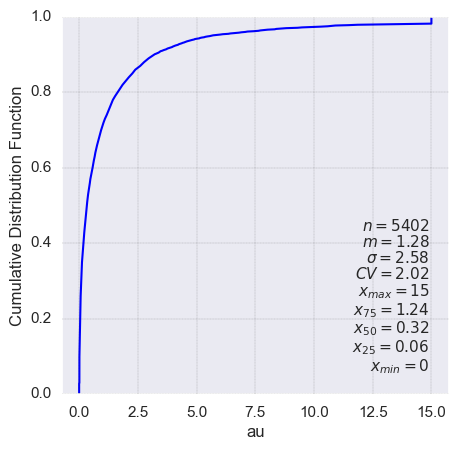

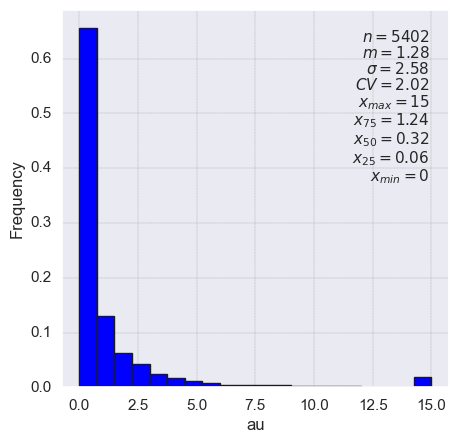

In [13]:
gs.histogram_plot (b880, var = 'au', 
                     icdf = True, color = 'blue',stat_fontsize = 11, grid = True, plot_style = True)

gs.histogram_plot (b880, var = 'au', 
                     icdf = False, color = 'blue',stat_fontsize = 11, grid = True, plot_style = True)

In [14]:
blksize = (10, 10, 5)
griddef_b880 = b880.infergriddef (blksize)
griddef_b880

Pygeostat GridDef:
62 322301.0 10.0 
69 2464926.0 10.0 
3 874.5 5.0

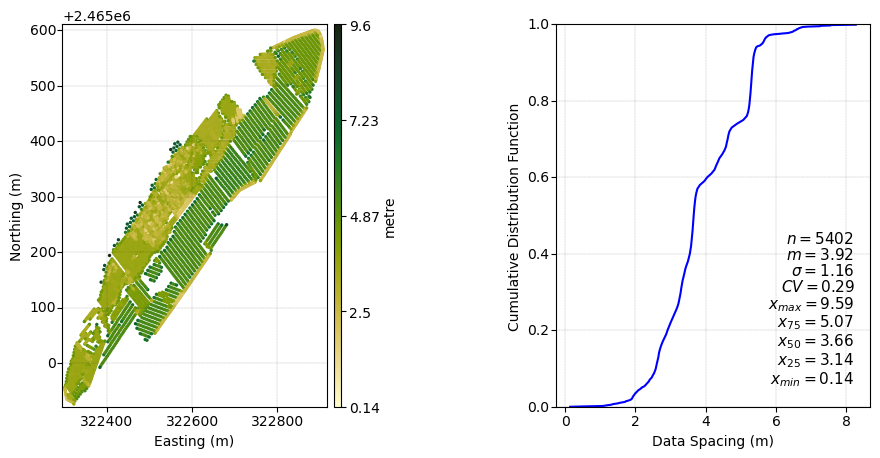

In [15]:
mpl.style.use ('default')

b880.spacing (3)
b880 ['Data Spacing (m)'].describe ()

fig, axes = plt.subplots (1, 2, figsize = (9, 4.5))
gs.location_plot (b880, var = 'Data Spacing (m)', 
                      cbar_label = 'metre', cmap = 'cmo.speed',
                      ax = axes [0], aspect = 1.3, s = 2, 
                      grid = True, title = '', plot_style = True)

gs.histogram_plot (b880, var = 'Data Spacing (m)', 
                      icdf = True, ax = axes [1], color = 'blue',stat_fontsize = 11, grid = True, plot_style = True)

fig.tight_layout ()
plt.subplots_adjust (left = 0.125, bottom = 0.1, right = 1.05, top = 0.95, wspace = 0.65, hspace = 0.25)
plt.savefig (outdir + 'figures/Figure_1.png', bbox_inches = 'tight', dpi = 150)

In [16]:
b880.spacing

<bound method DataFile.spacing of DataFile: datafiles/b_880.out
Attributes:
dh: 'bh',  x: 'x',  y: 'y',  z: 'z',  
Variables:
au
Grid Definitions:
62 322301.0 10.0 
69 2464926.0 10.0 
3 874.5 5.0>

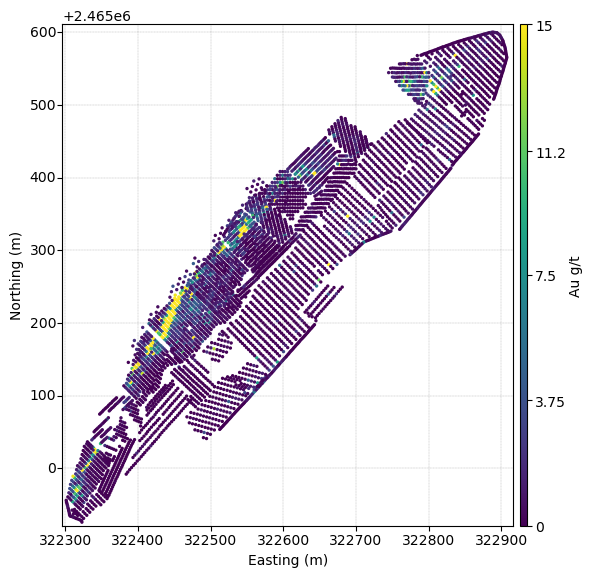

In [17]:
mpl.style.use ('default')
gs.location_plot (b880, var = 'au', xlabel = 'Easting (m)', ylabel = 'Northing (m)', griddef = griddef_b880, 
                  figsize = (6, 10), s = 2, cmap = 'viridis', axis_xy = False, title = '',
                 cbar_label = 'Au g/t',grid = True, vlim = (0, 15), slice_number = 1,
                 slicetol = 1, orient = 'xy', plot_style = True)

plt.savefig ('location_map.png', bbox_inches = 'tight', dpi = 150)

##### Declustring

#### Using `declus.exe` `GSLIB` program 

In [18]:
declus = gs.Program (program = exedir + 'declus.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmpx2ecevp5\declus.par has been copied to the clipboard


In [19]:
decluspar = """   Parameters for DECLUS
                  *********************

START OF PARAMETERS:
{datafl}                          - file with data
2   3   4   5                     - columns for X, Y, Z, and variable
-1.0e21     1.0e21                - trimming limits
{output_1}                        - file for summary output
{output_2}                        - file for output with data & weights
1.0   0.1                         - Y and Z cell anisotropy (Ysize=size*Yanis)
0                                 - 0=look for minimum declustered mean (1=max)
{num}  {cmin}  {cmax}             - number of cell sizes, min size, max size
30                                - number of origin offsets
"""

declus.run (parstr = decluspar.format(datafl = datadir + 'b_880.out', 
                                output_1 = outdir + './declus/b880_declus.sum',
                                output_2 = outdir + './declus/b880_declus.out', num = 80, cmin = 5, cmax = 800), 
            liveoutput = False)
print (' ')
print ('The two outputs of the declus program are given as follows: ')

declus_sum_b880 = gs.DataFile (outdir + './declus/b880_declus.sum', readfl = True)
display (declus_sum_b880.head (n = 5))

declus_out_b880 = gs.DataFile (outdir + './declus/b880_declus.out', readfl = True)
display (declus_out_b880.head (n = 5))



Calling:  ['./exes/declus.exe', 'temp']
 
The two outputs of the declus program are given as follows: 


Cell Size  Declustered Mean
0      0.000             1.276
1      5.000             1.173
2     14.938             1.013
3     24.875             1.016
4     34.812             1.029

bh          x           y      z     au  Declustering Weight
0  1.0  322451.28  2465152.40  877.5  0.084             0.610346
1  2.0  322453.46  2465150.29  877.5  0.103             0.636794
2  3.0  322455.54  2465148.16  877.5  0.044             0.690385
3  4.0  322457.66  2465146.03  877.5  0.096             0.788164
4  5.0  322406.75  2465090.89  877.5  0.321             1.024121

#### Plot Cell Size

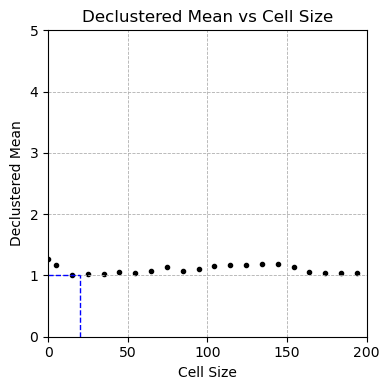

 
The data is observed at 20 m on the x-axis and 1.0 on the y-axis for cell declustring.
 
The recommended cell size has been considered to be 20 x 20 m.
 


In [20]:
mpl.style.use ('default')

fig, ax1 = plt.subplots (1, 1, figsize = (4, 4))

ax1.scatter (declus_sum_b880 ['Cell Size'], declus_sum_b880 ['Declustered Mean'], color = 'black', s = 9)
ax1.set_title ('Declustered Mean vs Cell Size')
ax1.set_xlabel ('Cell Size')
ax1.set_ylabel ('Declustered Mean')
ax1.set_xlim (0, 200)
ax1.set_ylim (0, 5)
ax1.plot ([20, 20], [0, 1], 'k--', lw = 1, color = 'blue')
ax1.plot ([0, 20], [1, 1], 'k--', lw = 1, color = 'blue')
plt.grid (linestyle = '--', linewidth = 0.6)

plt.tight_layout ()
plt.savefig (outdir + './figures/figure_4.png', bbox_inches = 'tight', dpi = 150)
plt.show ()

print (' ')
print ('The data is observed at 20 m on the x-axis and 1.0 on the y-axis for cell declustring.')
print (' ')
print ('The recommended cell size has been considered to be 20 x 20 m.')
print (' ')

#### Run DECLUS.EXE Program to determine cell size

In [20]:
declus = gs.Program (program = exedir + 'declus.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmp1fvv0d_n\declus.par has been copied to the clipboard


In [21]:
decluspar = """   Parameters for DECLUS
                  *********************

START OF PARAMETERS:
{datafl}                          - file with data
2   3   4   5                     - columns for X, Y, Z, and variable
-1.0e21     1.0e21                - trimming limits
{output_1}                        - file for summary output
{output_2}                        - file for output with data & weights
1.0   0.1                         - Y and Z cell anisotropy (Ysize=size*Yanis)
0                                 - 0=look for minimum declustered mean (1=max)
{num}  {cmin}  {cmax}             - number of cell sizes, min size, max size
25                                - number of origin offsets
"""

declus.run (parstr = decluspar.format(datafl = datadir + 'b_880.out', 
                                output_1 = outdir + './declus/b880_declus.sum',
                                output_2 = outdir + './declus/b880_declus.out', num = 1, cmin = 20, cmax = 20), 
            liveoutput = False)
print (' ')
print ('The two outputs of the declus program are given as follows: ')

declus_sum_b880 = gs.DataFile (outdir + './declus/b880_declus.sum', readfl = True)
display (declus_sum_b880.head (n = 5))

declus_out_b880 = gs.DataFile (outdir + './declus/b880_declus.out', readfl = True)
display (declus_out_b880.head (n = 5))



Calling:  ['./exes/declus.exe', 'temp']
 
The two outputs of the declus program are given as follows: 


Cell Size  Declustered Mean
0        0.0             1.276
1       20.0             1.002
2       20.0             1.002

bh          x           y      z     au  Declustering Weight
0  1.0  322451.28  2465152.40  877.5  0.084             0.607697
1  2.0  322453.46  2465150.29  877.5  0.103             0.643587
2  3.0  322455.54  2465148.16  877.5  0.044             0.682181
3  4.0  322457.66  2465146.03  877.5  0.096             0.732994
4  5.0  322406.75  2465090.89  877.5  0.321             0.892190

#### Decluster Data to CSV

In [22]:
declus_out_b880.data.to_csv ('./output/declus/declus_b880.csv', index = False)

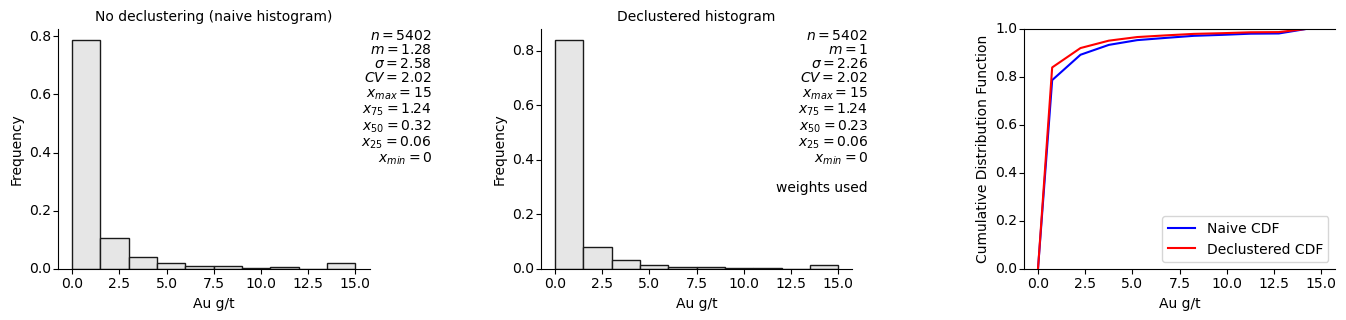

In [23]:
mpl.style.use ('default')
fig, axes = plt.subplots (1, 3, figsize = (7, 3))
axes = axes.flatten ()

gs.histogram_plot (b880, var = 'au', bins = 10, 
                      xlabel = 'Au g/t', grid = False, axis_xy = True, 
                      stat_xy = (1.2, 1), ax = axes [0],
                      title = 'No declustering (naive histogram)', 
                      plot_style = True)

gs.histogram_plot (declus_out_b880, var = 'au', ax = axes [1], 
                      bins = 10, xlabel = 'Au g/t', grid = False, 
                      axis_xy = True, weights = 'Declustering Weight', 
                      stat_xy = (1.05, 1), title = 'Declustered histogram', 
                      plot_style = True)

gs.histogram_plot (b880, var = 'au', bins = 10, 
                      xlabel = 'Au g/t', icdf = True, color = 'blue',
                      grid = False, axis_xy = True, stat_blk = False, 
                      ax = axes [2], label = 'Naive', plot_style = True)

gs.histogram_plot (declus_out_b880, var = 'au', ax = axes [2], 
                      bins = 10, xlabel = 'Au g/t', grid = False, 
                      axis_xy = True, weights = declus_out_b880.weights, 
                      icdf = True, color = 'red', stat_blk = False, 
                      label = 'Declustered', plot_style = True)

axes[2].legend(['Naive CDF', 'Declustered CDF'], loc = 4)    
fig.tight_layout ()
plt.subplots_adjust (left = 0.125, bottom = 0.1, right = 1.95, top = 0.9, wspace = 0.55, hspace = 0.35)

plt.savefig (outdir + 'figures/decl_Stat.png', bbox_inches = 'tight', dpi = 150)

#### Normal Score Transform for all Data 

In [24]:
nscoremv = gs.Program (program = exedir + 'nscoremv.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmpn8qzxryz\nscoremv.par has been copied to the clipboard


In [25]:
nscoremvpar = """Parameters for NSCOREMV
                ************************

START OF PARAMETERS:
{datafl}                    -  file with data               
1                           -  number of variables to transform
5                          -  columns for variables      
6  0  0  0                  -  columns for weights        
-1.0e21 1.0e21              -  trimming limits
{output}                    -  file for output              
{first_trans}               -  file for first transformation table
0  0  0                     -  transform according to ref. dist., column numbers
nofile                      -  file with reference dist.  
0  0  0                     -  transform according to ref. dist., column numbers
nofile                      -  file with reference dist.  


**Notes:

To transform according to a reference distribution, set the first number to the variable,
the second number to the column of the reference distribution variable, and the third column
to the weight if any.  If the variable column number is <= 0, this option will not be
considered so be sure to set it appropriately.
"""

nscoremv.run (parstr = nscoremvpar.format (datafl = outdir + './declus/b880_declus.out',
                                            output = outdir + './nscore/nscore.out',
                                          first_trans =  outdir + './nscore/nscore_au.trn'), liveoutput = False)



Calling:  ['./exes/nscoremv.exe', 'temp']


In [27]:
b880_ns = gs.DataFile (outdir + '/nscore/nscore.out', x = 'x', 
                         y = 'y', z = 'z',
                       dh = 'bh', griddef = griddef_b880, 
                         readfl = True)
b880_ns.rename (columns = {'NScore: au':'NS_Au'})

gs.write_gslib (b880_ns, outdir + '/nscore/nscore_au.out')

display (b880_ns.head (n = 5))

bh          x           y      z     au  Declustering Weight     NS_Au
0  1.0  322451.28  2465152.40  877.5  0.084             0.607697 -0.398536
1  2.0  322453.46  2465150.29  877.5  0.103             0.643587 -0.312614
2  3.0  322455.54  2465148.16  877.5  0.044             0.682181 -0.655091
3  4.0  322457.66  2465146.03  877.5  0.096             0.732994 -0.336659
4  5.0  322406.75  2465090.89  877.5  0.321             0.892190  0.158108

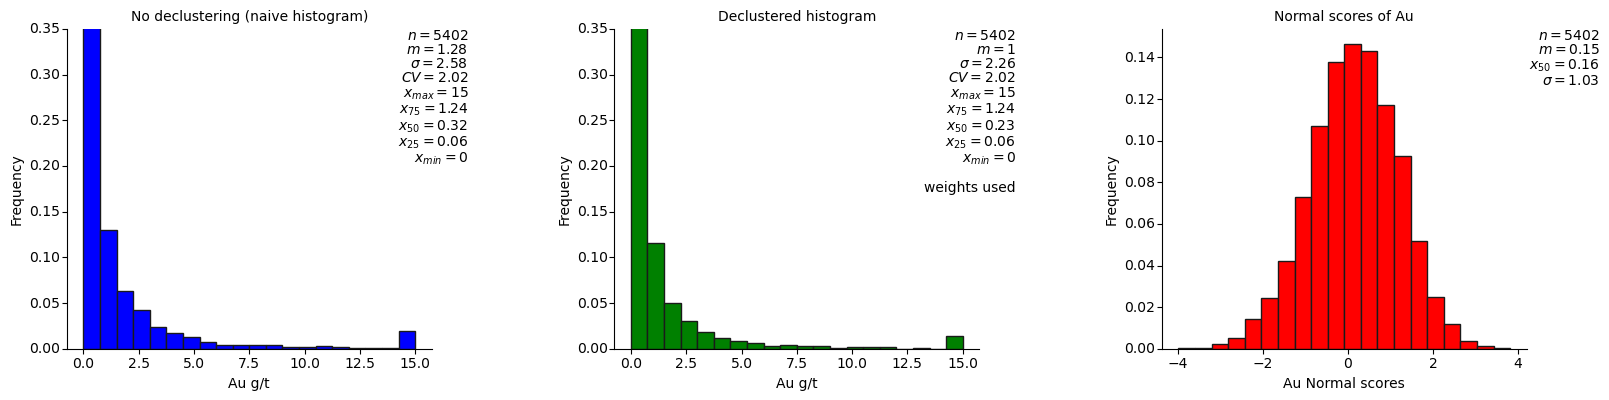

In [28]:
mpl.style.use ('default')

fig, axes = plt.subplots (1, 3, figsize = (8, 4))
axes = axes.flatten ()

gs.histogram_plot (b880, var = 'au', bins = 20, xlabel = 'Au g/t',color ='Blue', 
                   grid = False, axis_xy = True, stat_xy = (1.1, 1), 
                   ax = axes [0], ylim = (0, 0.35),
                  title = 'No declustering (naive histogram)', 
                   plot_style = True)
gs.histogram_plot (declus_out_b880, var = 'au', ax = axes [1],color ='Green', 
                   bins = 20, xlabel = 'Au g/t', 
                       grid = False, axis_xy = True, 
                   weights = 'Declustering Weight', 
                   stat_xy = (1.1, 1), ylim = (0, 0.35),
                  title = 'Declustered histogram', 
                   plot_style = True)
gs.histogram_plot (b880_ns, var = 'NS_Au', bins = 20,color ='Red', 
                   xlabel = 'Au Normal scores', icdf = False, 
                   grid = False, axis_xy = True, 
                   stat_xy = (1.2, 1), ax = axes [2], 
                  title = 'Normal scores of Au', 
                   stat_blk = 'minimal', plot_style = True)

print (' ')    
fig.tight_layout ()
plt.subplots_adjust (left = 0.125, bottom = 0.1, 
                     right = 1.95, top = 0.9, wspace = 0.5, 
                     hspace = 0.35)
plt.savefig (outdir + 'figures/dec_NS_st.png', 
             bbox_inches = 'tight', dpi = 150)

#### Dcluse and NScore for The lime Domain

#### Laod the `varmap.exe` `GSLIB` program and its parameter file

In [29]:
varmap = gs.Program (program = exedir + 'varmap.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmplknpuhpc\varmap.par has been copied to the clipboard


In [30]:
varmappar = """   Parameters for VARMAP
                  *********************

START OF PARAMETERS:
./output/nscore/nscore_au.out                 - file with data
1   7                                    - number of variables: column numbers
-1.0e21     1.0e21                       - trimming limits
0                                        - 1=regular grid, 0=scattered values
50   50    50                            - if =1: nx,     ny,   nz
25.0  25.0  5                          - xsiz, ysiz, zsiz
2   3   4                                - if =0: columns for x,y, z coordinates
./output/varmap/varmap_b880_ns.out     - file for variogram output
 9    9     9                            - nxlag, nylag, nzlag
50.0   50.0   1.0                      - dxlag, dylag, dzlag
5                                        - minimum number of pairs
1                                        - standardize sill? (0=no, 1=yes)
1                                        - number of variograms
1   1   1                                - tail, head, variogram type


type 1 = traditional semivariogram
     2 = traditional cross semivariogram
     3 = covariance
     4 = correlogram
     5 = general relative semivariogram
     6 = pairwise relative semivariogram
     7 = semivariogram of logarithms
     8 = semimadogram
     9 = indicator semivariogram - continuous
     10= indicator semivariogram - categorical
"""

varmap.run (parstr = varmappar, liveoutput = False)

Calling:  ['./exes/varmap.exe', 'temp']


In [31]:
griddef_3 = gs.GridDef (grid_file = 'varmap_grid_b880.txt')
griddef_3

Pygeostat GridDef:
21 -10.0 1.0 
21 -10.0 1.0 
21 -10.0 1.0

In [32]:
varmap_b880_ns = gs.DataFile (outdir + './varmap/varmap_b880_ns.out', 
                                griddef = griddef_3)
varmap_b880_ns.head (n=5)

variogram  number of pairs  head mean  tail mean  head variance  \
0        NaN              0.0        NaN        NaN            NaN   
1        NaN              0.0        NaN        NaN            NaN   
2        NaN              0.0        NaN        NaN            NaN   
3        NaN              0.0        NaN        NaN            NaN   
4        NaN              0.0        NaN        NaN            NaN   

   tail variance  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

# I Face an isssue ploting the Variogram map 

#### Experimental Variogram calcuation for the Normal Score Data

In [34]:
varcalc = gs.Program (program = exedir + 'varcalc', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmp05dv7byq\varcalc.par has been copied to the clipboard


In [35]:
varcalcpar = """  Parameters for VARCALC
                  **********************
 
START OF PARAMETERS:
./output/nscore/nscore_au.out                      - file with data
2   3   4                                       - columns for X, Y, Z coordinates
1   7   0                                       - number of variables,column numbers (position used for tail,head variables below)
-998.0    1.0e21                                - trimming limits
3                                               - number of directions
45  22.5 9999 0.0 0.0 5.0 0.0                 - Major: azm,azmtol,bandhorz,dip,diptol,bandvert,tilt
30  10  35                                    - number of lags,lag distance,lag tolerance
135.0 22.5 999 0.0 0.0 5.0 0.0                 - Minor: azm,azmtol,bandhorz,dip,diptol,bandvert,tilt
30  10  35                                     - number of lags,lag distance,lag tolerance
0.0 0.0 999 -90.0 0.0 5.0 0.0                 - Minor: azm,azmtol,bandhorz,dip,diptol,bandvert,tilt
30 10   5                                    - number of lags,lag distance,lag tolerance
./output/experimental/exp2_var_b880_ns.out     - file for experimental variogram points output.
0                                               - legacy output (0=no, 1=write out gamv2004 format)
1                                               - run checks for common errors
1                                               - standardize sills? (0=no, 1=yes)
1                                               - number of variogram types
1   1   1   ?                                   - tail variable, head variable, variogram type (and cutoff/category), sill




NOTES ON VARIOGRAM CALCULATION:
1) By default, varcalc runs checks for common errors in parameter choices. This can be
   disabled if desired. 
2) Varcalc can standardize using a provided sill (such as a declustered variance).
   For example, if variable 1 has a declustered variance of 8.6, the traditional
   semivariogram could be standardized by setting the variogram type to:
      1  1  1  8.6
   Alternatively, varcalc can attempt to infer a sill for standardizing by setting
   the variogram type to:
      1  1  1  ?
   The calculated sills will be written to the console. 
3) Variogram types are the same as in GSLIB:
      1 = traditional semivariogram
      2 = traditional cross semivariogram
      3 = covariance   (-3 calculates variance (provided sill) -covariance)
      4 = correlogram  (-4 calculates 1-correlation)
      5 = general relative semivariogram
      6 = pairwise relative semivariogram
      7 = semivariogram of logarithms
      8 = semimadogram
      9 = indicator semivariogram - continuous  - requires a cutoff
      10= indicator semivariogram - categorical - requires a category
4) For indicator variograms, the variogram cutoff/categories are specified immediately after the variogram type
    1   1   9   1.0   ?               -tail variable, head variable, variogram type (and cutoff/category), sill
5) If desired, the program can write out the variogram points in the gamv2004 style
   for compatibility with older versions. Tilt was not supported in pre-varcalc experimental variogram
   programs so use carefully. 
"""

varcalc.run (parstr = varcalcpar, liveoutput = False)



Calling:  ['./exes/varcalc', 'temp']


In [36]:
exp_var_b880_ns = gs.DataFile (outdir + 'experimental/exp2_var_b880_ns.out')
exp_var_b880_ns.head ()

Variogram Index  Lag Distance  Number of Pairs  Variogram Value  \
0              1.0     23.019419         125321.0         0.528038   
1              1.0     29.470508         201439.0         0.569062   
2              1.0     35.795068         291123.0         0.606018   
3              1.0     42.280881         397593.0         0.639856   
4              1.0     48.869169         513343.0         0.670084   

   Variogram Number  Calculation Azimuth  Calculation Dip  Variogram Type  
0               1.0                 45.0              0.0             1.0  
1               1.0                 45.0              0.0             1.0  
2               1.0                 45.0              0.0             1.0  
3               1.0                 45.0              0.0             1.0  
4               1.0                 45.0              0.0             1.0

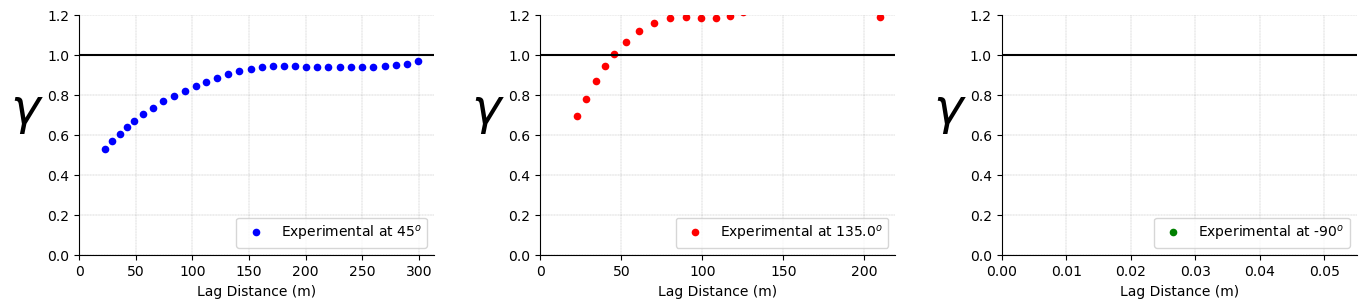

In [37]:
mpl.style.use ('default')
fig, axes = plt.subplots (1, 3, figsize = (7, 3))
axes = axes.flatten ()

lab = ['Experimental at $45^{o}$', 'Experimental at $135.0^{o}$', 'Experimental at -$90^{o}$']
colors = ['blue', 'red', 'green']

for i, ax, j, m in zip (lab, axes, range (3), colors):
    j = j + 1
    gs.variogram_plot (exp_var_b880_ns.data, index = j,  
                       grid = True, 
                       color = m, minpairs = True, label = i, 
                       experimental = True, 
                        ax = ax, axis_xy = True, unit = 'm', 
                       ms = 5.5, pairnumbers = False)
    ax.legend (loc = 4, fontsize = 10)
    ax.xaxis.label.set_size (10)

fig.tight_layout ()

plt.subplots_adjust (left = 0.125, bottom = 0.1, 
                     right = 1.95, top = 0.9, wspace = 0.3, 
                     hspace = 0.55)

plt.savefig (outdir + 'figures/ex_vaio_ns.png', 
             bbox_inches = 'tight', dpi = 150)

In [38]:
varmodel = gs.Program (program = exedir + 'varmodel', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmpgisqehiv\varmodel.par has been copied to the clipboard


In [39]:
varmodelpar = """ Parameters for VARMODEL
                  ***********************
 
START OF PARAMETERS:
./output/model/varmodel_dirc_b880_ns.out   - file for modeled variogram points output
3                                             - number of directions to model points along
  45.0 0.0  5500   0.5                        - azm, dip, npoints, point separation
  135.0 0.0  5500   0.5                       - azm, dip, npoints, point separation
  0.0  90.0  180   0.5                        - azm, dip, npoints, point separation
3    0.0                                      - nst, nugget effect
1    0.50  45   0.0   0.0                    - it,cc,ang1,ang2,ang3
        25.0  49.0  0.01                    - a_hmax, a_hmin, a_vert
1    0.40  45   0.0   0.0                    - it,cc,ang1,ang2,ang3
       160.0 40.0 0.03                        - a_hmax, a_hmin, a_vert
1    0.10  45   0.0   0.0                   - it,cc,ang1,ang2,ang3
       1000.0 1.0  0.01                    - a_hmax, a_hmin, a_vert
0   100000                                    - fit model (0=no, 1=yes), maximum iterations
1.0                                           - variogram sill (can be fit, but not recommended in most cases)
1                                             - number of experimental files to use
varcalc.out                                   - experimental output file 1
2   1   4                                     - # of variograms (<=0 for all), variogram #s
1   1   10                                    - # pairs weighting, inverse distance weighting, min pairs
0     10.0                                    - fix Hmax/Vert anis. (0=no, 1=yes)
0      1.0                                    - fix Hmin/Hmax anis. (0=no, 1=yes)
varmodelfit.var                               - file to save fit variogram model



NOTES ON VARIOGRAM FITTING:
1) This program can be run as the GSLIB program vmodel where an already
   fit variogram model is provided. 
2) Alternatively, a variogram model can be fit. Any parameter, except
   the number of structures can be fit. Fitting variogram angles
   is NOT recommended best practice. Options for fitting are:
   ? - fit the parameter with no constraints
   a:b - fit the parameter between a and b
   a: - fit the parameter so it is >=a
   :b - fit the parameter so it is <=b
   There must be no spaces in a:b!
3) Structure types (it) are:
   1 - spherical variogram model
   2 - exponential variogram model
   3 - gaussian variogram model
   4 - hole effect variogram model (cannot be automatically fit)
"""
varmodel.run (parstr = varmodelpar, liveoutput = False)

varmodel_dirc_b880_ns = gs.DataFile (outdir +'model/varmodel_dirc_b880_ns.out', readfl = True)
varmodel_dirc_b880_ns.head ()

Calling:  ['./exes/varmodel', 'temp']


Variogram Index  Lag Distance  Number of Pairs  Variogram Value  \
0              1.0           0.5              1.0         0.016948   
1              1.0           1.0              1.0         0.033884   
2              1.0           1.5              1.0         0.050796   
3              1.0           2.0              1.0         0.067672   
4              1.0           2.5              1.0         0.084499   

   Variogram Number  Calculation Azimuth  Calculation Dip  
0               1.0                 45.0              0.0  
1               1.0                 45.0              0.0  
2               1.0                 45.0              0.0  
3               1.0                 45.0              0.0  
4               1.0                 45.0              0.0

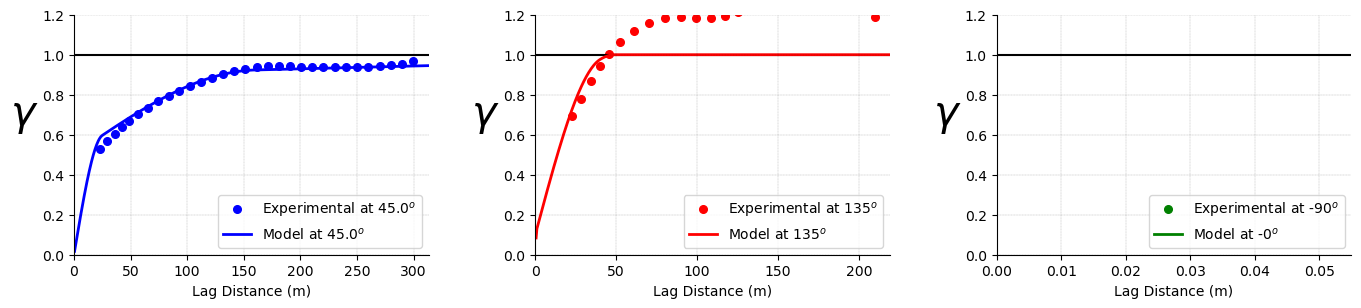

In [40]:
mpl.style.use ('default')

fig, axes = plt.subplots (1, 3, figsize = (7, 3))

axes = axes.flatten ()
lab = ['Experimental at $45.0^{o}$', 'Experimental at $135^{o}$', 'Experimental at -$90^{o}$']
lab_2 = ['Model at $45.0^{o}$', 'Model at $135^{o}$', 'Model at -$0^{o}$']
colors = ['blue', 'red', 'green']

for i, ax, j, k, m in zip (lab, axes, range (3), lab_2, colors):
    j = j + 1
    gs.variogram_plot (exp_var_b880_ns.data, index = j,  grid = True, 
                       color = m, minpairs = False, 
                       label = i, experimental = True, 
                        ax = ax, axis_xy = True, unit = 'm', 
                       ms = 5.5, plot_style = True)
    gs.variogram_plot (varmodel_dirc_b880_ns.data, index = j, 
                       sill = False, grid = False, minpairs = False, 
                        label = k, experimental = False, ax = ax, 
                       axis_xy = True, unit = 'm'
                       , ms = 0, lw = 2, color = m, plot_style = True)
    ax.legend (loc = 4, fontsize = 10)
    ax.xaxis.label.set_size (10)

fig.tight_layout ()

plt.subplots_adjust (left = 0.125, bottom = 0.1, 
                     right = 1.95, top = 0.9, wspace = 0.3, hspace = 0.55)

plt.savefig (outdir + 'figures/vaimod.png', 
             bbox_inches = 'tight', dpi = 150)

In [47]:
b880_vario_ns = '''
3    0.0                                      - nst, nugget effect
1    0.50  45   0.0   0.0                    - it,cc,ang1,ang2,ang3
        25.0  49.0  0.01                    - a_hmax, a_hmin, a_vert
1    0.40  45   0.0   0.0                    - it,cc,ang1,ang2,ang3
       160.0 40.0 0.03                        - a_hmax, a_hmin, a_vert
1    0.10  45   0.0   0.0                   - it,cc,ang1,ang2,ang3
       1000.0 1.0  0.01                    - a_hmax, a_hmin, a_vert
                  '''
print ('')
print ('The parameters of the analytical model fitted to the experimental variogram of the normal scores of the Au grade is:')       
print ('')
print (b880_vario_ns)


The parameters of the analytical model fitted to the experimental variogram of the normal scores of the Au grade is:


3    0.0                                      - nst, nugget effect
1    0.50  45   0.0   0.0                    - it,cc,ang1,ang2,ang3
        25.0  49.0  0.01                    - a_hmax, a_hmin, a_vert
1    0.40  45   0.0   0.0                    - it,cc,ang1,ang2,ang3
       160.0 40.0 0.03                        - a_hmax, a_hmin, a_vert
1    0.10  45   0.0   0.0                   - it,cc,ang1,ang2,ang3
       1000.0 1.0  0.01                    - a_hmax, a_hmin, a_vert
                  


#### Use sequential Gaussian simulation to simulate $200$ realizations of the normal score variable

In [48]:
sgsim = gs.Program (program = exedir + 'sgsim.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmprw_czcs3\sgsim.par has been copied to the clipboard


In [49]:
sgsimpar = """    Parameters for SGSIMv4
                  **********************

START OF PARAMETERS:
{datafl}                            - file with data
2  3  4  7  0  0                    - columns for X,Y,Z,vr,wt,sec.var.
-998.0       1.0e21                 - trimming limits
0                                   - transform the data (0=no, 1=yes)
sgsim.trn                           - file for output trans table
0                                   - consider ref. dist (0=no, 1=yes)
histsmth.out                        - file with ref. dist distribution
1  2                                - columns for vr and wt
4.0    11.5                         - zmin,zmax (for tail extrapolation)
1       4.0                         - lower tail option (1=linear), parameter
1      11.5                         - upper tail option (1=linear), parameter
1                                   - debugging level: 0,1,2,3
sgsim.dbg                           - file for debugging output
{output}                            - file for simulation output
{real}                              - number of realizations to generate
{grid}
56693                               - random number seed
0     40                            - min and max original data for sim
40                                  - number of simulated nodes to use
1                                   - assign data to nodes (0=no, 1=yes)
1     3                             - multiple grid search (0=no, 1=yes),num
0                                   - maximum data per octant (0=not used)
1000.0  1000.0  40.0                 - maximum search radii (hmax,hmin,vert)
45.0   0.0   0.0                    - angles for search ellipsoid
0     0.60   1.0                    - ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC, corr and VRF
nofile                              - file with LVM, EXDR, or COLC variable
0                                   - column for secondary variable
{varmodel}
"""

pars = dict (datafl = outdir + '/nscore/nscore_au.out', 
             output = outdir + '/simulation/sgsim.out',
                                    real = 10, grid = griddef_b880, 
             varmodel = b880_vario_ns)
sgsim.run (parstr = sgsimpar.format (**pars), liveoutput = False)

Calling:  ['./exes/sgsim.exe', 'temp']


#### Load the simulated realizations

In [50]:
simu_real = gs.DataFile (outdir + '/simulation/sgsim.out', 
                         griddef = griddef_b880)
simu_real.head ()

value
0  1.026144
1  0.565773
2 -0.355219
3  0.504868
4  1.064882

In [51]:
addcoord = gs.Program (program = exedir + 'addcoord.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmpvm_njted\addcoord.par has been copied to the clipboard


In [52]:
addcoordpar = """                  Parameters for ADDCOORD
                  ***********************

START OF PARAMETERS:
{datafl}                         -file with data
{output}                      -file for output
10                                 -realization number
{grid}
3 3 6                            -decimals for x, y, z (-1=exclude)
"""
addcoord.run (parstr = addcoordpar.format (datafl = outdir+'simulation/sgsim.out',
                                          output = outdir+'/simulation/coord.out', grid = griddef_b880))

Calling:  ['./exes/addcoord.exe', 'temp']

 ADDCOORD VERSION: 4.1.0

 Data File = output/simulation/sgsim.out             
 Output File = output//simulation/coord.out            
 Realization number =           10
 X grid size =           62   322301.000000000        10.0000000000000     
 Y grid size =           69   2464926.00000000        10.0000000000000     
 Z grid size =            3   874.500000000000        5.00000000000000     
 decimals =            3           3           6
 
 Format: (f10.03,x,f11.03,x,f10.06,x,a)      

 ADDCOORD: 4.1.0 Finished



In [53]:
a = simu_real ['value']
for t, x in enumerate (a):
    print (t,x)

0 1.0261443
1 0.56577343
2 -0.35521913
3 0.50486779
4 1.0648819
5 -0.61865145
6 -1.3798223
7 -0.42816114
8 -1.6881193
9 -1.436774
10 -1.2008598
11 -1.3894863
12 -1.2954336
13 -0.28406721
14 0.071980089
15 1.7080758
16 0.38392189
17 -0.25170901
18 -0.45902455
19 -0.40945125
20 -0.52015406
21 -0.21955013
22 0.41026691
23 -0.014749646
24 0.92049086
25 0.033944696
26 0.1276589
27 -0.67455101
28 0.86085367
29 2.0504265
30 1.2884502
31 0.52230221
32 1.4661148
33 0.66880238
34 -0.16380465
35 0.62619174
36 0.97249532
37 0.28409883
38 -1.1500026
39 -1.0503376
40 0.4875803
41 1.5520084
42 1.0653143
43 -0.72362041
44 -1.1288356
45 0.056144595
46 0.0092027187
47 -0.48797393
48 -0.65592813
49 -0.14385951
50 -1.8328096
51 -1.147449
52 0.38958535
53 0.32692432
54 0.4484399
55 0.43095422
56 -1.2476544
57 -0.99469924
58 -1.1343796
59 0.54735368
60 0.27078784
61 0.35844737
62 1.1923949
63 0.64142352
64 2.3300333
65 1.4880443
66 1.011394
67 0.62986434
68 -0.42279351
69 -0.98874652
70 0.1755957
71 -1.1078

25161 1.9461762
25162 2.269716
25163 0.20914227
25164 -0.27558839
25165 1.1602255
25166 0.031746149
25167 0.34984416
25168 0.30125704
25169 0.18919329
25170 -0.34092364
25171 -2.4760284
25172 0.91189241
25173 -0.50876534
25174 -0.035895705
25175 0.63874614
25176 0.26751488
25177 1.1613147
25178 1.434243
25179 0.52124822
25180 -1.7160486
25181 -1.3907125
25182 -0.77989262
25183 0.77439857
25184 0.57030475
25185 0.46275991
25186 -0.19335006
25187 -1.4085951
25188 -0.96243256
25189 -1.217314
25190 -0.76106417
25191 -0.68741226
25192 -0.36377808
25193 0.2116809
25194 0.18497099
25195 -1.0103896
25196 -0.6775651
25197 -0.57607657
25198 0.68209016
25199 1.1838828
25200 0.41336811
25201 1.53518
25202 1.3360767
25203 1.315469
25204 -0.012457594
25205 -0.97479081
25206 -1.0033153
25207 -2.0119631
25208 -0.57237315
25209 -0.24816036
25210 -0.1463878
25211 -0.13785458
25212 0.4645409
25213 0.37172371
25214 1.5467896
25215 0.46687588
25216 0.40015587
25217 0.89525956
25218 0.39522174
25219 0.81257

32791 1.3378861
32792 -0.62748581
32793 0.32375729
32794 0.52753234
32795 0.61749089
32796 -0.43388426
32797 0.35745174
32798 -0.376706
32799 0.66611987
32800 -1.7108592
32801 0.13146076
32802 0.66799128
32803 1.552999
32804 0.51322436
32805 0.32374424
32806 0.95220429
32807 -1.0550172
32808 -0.21188819
32809 0.4049114
32810 1.0260389
32811 0.064385787
32812 -0.42846024
32813 -0.30802748
32814 -0.22447272
32815 -0.13681379
32816 0.92085505
32817 -0.92170334
32818 -0.12579316
32819 -1.0456641
32820 -0.37471908
32821 -1.3515778
32822 0.53011239
32823 0.33966801
32824 0.144936
32825 0.31200799
32826 1.332953
32827 0.85051399
32828 -0.22276799
32829 1.272117
32830 0.040520001
32831 1.020228
32832 0.549389
32833 0.84195101
32834 0.179258
32835 -0.33429599
32836 -0.77825201
32837 -0.85461199
32838 -0.54056001
32839 -1.0363801
32840 -1.70946
32841 0.811064
32842 -1.451813
32843 -0.18785501
32844 0.099702001
32845 0.088432997
32846 0.35332799
32847 0.258802
32848 0.91056502
32849 0.77607697
32

49659 0.68273276
49660 -1.5967228
49661 -1.2499964
49662 -0.49382949
49663 0.84501982
49664 0.38850766
49665 -0.31326401
49666 -0.56637114
49667 -0.98949695
49668 -0.13832819
49669 -0.62096548
49670 -0.75375104
49671 -0.12166853
49672 -1.0616202
49673 -0.64876294
49674 -0.015841007
49675 -0.79964948
49676 -0.73730224
49677 -2.7577899
49678 -1.8627849
49679 -2.4053407
49680 -1.1564932
49681 0.23575807
49682 0.49666783
49683 0.84944046
49684 0.62486356
49685 1.6819785
49686 1.6445599
49687 1.3681275
49688 1.6073365
49689 0.15100536
49690 -0.10907915
49691 -0.64173913
49692 -0.59637421
49693 -1.1766622
49694 -1.2094593
49695 -0.7446571
49696 1.126844
49697 -0.063708127
49698 -0.989151
49699 -2.2159798
49700 -2.8130367
49701 -1.5703058
49702 -0.63079888
49703 -1.1137199
49704 -1.5291523
49705 -1.8270985
49706 -2.4398525
49707 -2.7286363
49708 -1.4760978
49709 -1.0877554
49710 -1.9318548
49711 -0.63737571
49712 -0.84098721
49713 0.34011707
49714 -0.37939972
49715 -0.088201582
49716 -1.50464

57566 0.107532
57567 0.27643099
57568 -0.25396901
57569 -0.483841
57570 -0.92668402
57571 -0.54860902
57572 -1.285238
57573 0.54258901
57574 1.0116935
57575 -0.26869518
57576 0.74126089
57577 0.78218406
57578 0.71851754
57579 -0.33335882
57580 1.9502044
57581 0.32268909
57582 0.024958819
57583 -1.5773144
57584 -2.2678456
57585 -1.1062543
57586 -0.91412294
57587 0.79823041
57588 -0.26442516
57589 0.42529202
57590 0.15590438
57591 0.8905533
57592 0.66800302
57593 0.9325093
57594 0.94219333
57595 0.60808682
57596 0.23403114
57597 -0.1821813
57598 0.52885348
57599 -0.032867774
57600 -0.56110853
57601 -0.55879992
57602 0.45363089
57603 0.1870188
57604 0.35768569
57605 1.4185042
57606 1.0638242
57607 0.58329785
57608 -0.24380146
57609 -0.45482224
57610 0.16915949
57611 0.45424521
57612 0.84213901
57613 0.817312
57614 2.0736921
57615 1.153295
57616 1.582567
57617 -0.035645001
57618 0.98952502
57619 0.42565301
57620 0.584279
57621 0.80491501
57622 -1.515944
57623 -0.93793398
57624 -0.70340002


73756 0.90390539
73757 -0.038196445
73758 -0.6235466
73759 0.2066673
73760 1.4541869
73761 0.7418313
73762 0.4095512
73763 -0.088187337
73764 0.95434642
73765 0.81397825
73766 0.48706073
73767 0.21018207
73768 1.151713
73769 1.1381
73770 0.27865094
73771 -0.096078746
73772 -0.019162059
73773 -0.30332428
73774 -0.055522323
73775 -0.3176496
73776 -0.8830092
73777 1.3128935
73778 -0.39834028
73779 -0.65443671
73780 0.27904141
73781 0.9829421
73782 0.79952627
73783 -0.50634551
73784 -0.25564694
73785 -0.72018886
73786 0.69598538
73787 0.57163346
73788 -0.44079599
73789 -1.1172416
73790 0.22944155
73791 -0.93269372
73792 0.29766986
73793 -0.71333206
73794 0.27895138
73795 -1.0238156
73796 -1.1148288
73797 -2.8798928
73798 -1.5132166
73799 -0.54592603
73800 -1.8006539
73801 -1.1315155
73802 -1.7943326
73803 -0.23747927
73804 -0.197501
73805 0.52569568
73806 -0.5739637
73807 1.4712986
73808 1.0927491
73809 0.29851767
73810 0.48098391
73811 1.5249741
73812 1.1997101
73813 -0.30104899
73814 -1.

78384 -0.60931355
78385 -1.7530909
78386 -1.4075587
78387 0.57204336
78388 1.0192169
78389 0.15692505
78390 0.47172555
78391 -0.98409069
78392 -0.26052165
78393 0.85675436
78394 2.3787394
78395 2.5879769
78396 1.5971758
78397 1.4781485
78398 0.40730795
78399 0.90829408
78400 -0.030751154
78401 0.21900946
78402 0.0030845404
78403 -1.9072971
78404 -0.75877541
78405 0.26404887
78406 0.20938012
78407 -0.94062555
78408 -1.2878556
78409 -0.82265252
78410 0.40582305
78411 -0.96421576
78412 -1.8213422
78413 -1.1161063
78414 -0.20958996
78415 -0.25681782
78416 1.1571772
78417 1.0144625
78418 0.3449406
78419 -0.50689811
78420 -0.14457884
78421 0.96113044
78422 0.3440676
78423 0.8228848
78424 0.3969022
78425 0.35702708
78426 1.045778
78427 0.3487159
78428 0.26427296
78429 0.72856188
78430 -1.2138412
78431 0.2815198
78432 -0.40144151
78433 -0.6804623
78434 -0.074282855
78435 0.19743817
78436 -0.63828319
78437 0.36007148
78438 0.22234595
78439 -0.095618159
78440 -0.39826912
78441 0.12332898
78442 0

98330 0.51132298
98331 -0.23129779
98332 -0.058368251
98333 -0.45628148
98334 -0.46781498
98335 -0.8845948
98336 -1.2575083
98337 -0.050776258
98338 0.55696464
98339 1.4364128
98340 1.4472876
98341 0.67576802
98342 -0.34147799
98343 -0.7460289
98344 0.39703164
98345 0.8713032
98346 -0.078919768
98347 -1.6070144
98348 -1.189971
98349 -0.93528497
98350 -0.56084979
98351 0.012046059
98352 0.92732882
98353 1.2514341
98354 0.67194593
98355 0.28058845
98356 0.95204365
98357 -0.1065222
98358 -1.5363469
98359 -1.9936711
98360 -2.4376864
98361 -1.3071066
98362 -0.13344222
98363 0.26823163
98364 0.77689755
98365 -0.59028161
98366 0.020532638
98367 1.1864403
98368 0.83038396
98369 0.5143016
98370 0.51711965
98371 0.55461627
98372 0.78036249
98373 0.53834325
98374 -0.24476118
98375 0.75453645
98376 -0.16811186
98377 0.12059941
98378 0.14869532
98379 -0.057984874
98380 -0.52566952
98381 -0.039719984
98382 0.34579808
98383 -0.35727996
98384 0.29016969
98385 -0.61111403
98386 -0.70425999
98387 -0.508

99064 -0.54172683
99065 -1.4994733
99066 -2.257376
99067 -2.2066336
99068 0.0060633421
99069 -0.21057132
99070 -0.45973486
99071 -1.7618542
99072 -0.30105975
99073 -1.3846756
99074 -1.773095
99075 -1.9224378
99076 -0.9115181
99077 0.12137362
99078 1.1854398
99079 0.32303947
99080 0.48428836
99081 0.67193949
99082 2.3354516
99083 2.9757538
99084 1.6108435
99085 2.8589673
99086 0.81412148
99087 0.56623912
99088 0.39189187
99089 0.043614414
99090 0.14843044
99091 -1.6011077
99092 -1.1797739
99093 0.018249288
99094 -0.049387366
99095 -1.2850313
99096 -0.50819063
99097 0.97926992
99098 -0.26787809
99099 -0.48640525
99100 -0.1291666
99101 -0.61848921
99102 0.252534
99103 0.79065502
99104 0.3262209
99105 0.66534132
99106 -0.081950828
99107 -0.26276368
99108 -0.6773361
99109 -0.13660567
99110 -0.23737209
99111 -0.4149721
99112 -0.043347701
99113 -0.38292825
99114 0.079594254
99115 -0.52256286
99116 0.60399109
99117 -0.84380317
99118 0.78954536
99119 1.5121508
99120 0.74736619
99121 0.69796807


125331 -0.18991351
125332 -0.95278776
125333 -2.3479657
125334 -1.5071089
125335 0.32628584
125336 1.3125372
125337 2.557205
125338 3.8204796
125339 3.6439247
125340 2.307343
125341 -0.29802215
125342 -1.523838
125343 -0.039803937
125344 1.2682419
125345 -0.19560786
125346 1.2185055
125347 1.6194544
125348 1.6888151
125349 -0.17574592
125350 -0.9646126
125351 -0.69670266
125352 0.12732609
125353 -0.82629603
125354 -1.6524024
125355 -2.6671634
125356 -1.8691217
125357 -1.1775459
125358 0.53053641
125359 0.062570952
125360 -0.73172355
125361 -0.71799994
125362 -0.87387162
125363 0.32596308
125364 0.76251006
125365 1.1036081
125366 1.1477836
125367 -0.50527889
125368 -0.5033164
125369 -0.60035253
125370 -0.99818331
125371 -0.87615198
125372 -0.37213796
125373 0.2006588
125374 -0.16091859
125375 -1.5724125
125376 -1.3015115
125377 -0.70585734
125378 -0.35179037
125379 -0.99582177
125380 -1.0620704
125381 -1.2399261
125382 0.82201016
125383 2.1098602
125384 1.9130166
125385 1.946285
125386 

126536 0.34800431
126537 -0.073194146
126538 -0.34798497
126539 -0.67192996
126540 -0.72525871
126541 0.32829311
126542 0.52229279
126543 -0.5859549
126544 -1.3851887
126545 0.017952025
126546 -0.21531206
126547 -0.91008055
126548 -1.2716999
126549 -1.808424
126550 -1.6405764
126551 -2.5307784
126552 0.055547595
126553 -0.63122463
126554 -0.059654832
126555 -0.75328183
126556 -1.1427839
126557 0.09942098
126558 -0.57350081
126559 0.032973833
126560 -0.77035034
126561 -0.37150738
126562 0.98971212
126563 0.97532386
126564 -0.32096642
126565 -0.0092522502
126566 -0.040852144
126567 -0.13614303
126568 -0.002218008
126569 -0.92207849
126570 -0.061599359
126571 0.9956286
126572 -0.019978151
126573 0.19553292
126574 -1.8180845
126575 -2.0352192
126576 -1.4322317
126577 0.12545648
126578 2.2110772
126579 2.5452852
126580 2.0326648
126581 1.5966563
126582 1.9607201
126583 1.4316219
126584 0.21462506
126585 -0.30780882
126586 0.048000775
126587 -0.44045922
126588 -1.606359
126589 -1.2718023
126

In [54]:
a = simu_real ['value']

reals = []

for t, x in enumerate (a):
    if t < 11:
        plot_real = t + 1
        real_nodes = griddef_b880.nx * griddef_b880.ny * griddef_b880.nz
        i = real_nodes * (plot_real - 1)
        j = real_nodes * plot_real
        c = a [i:j]
        reals.append (c)
    else:
        break
print (reals)

[0        1.026144
1        0.565773
2       -0.355219
3        0.504868
4        1.064882
           ...   
12829   -1.092246
12830    0.012751
12831    0.814712
12832    0.058679
12833   -0.630790
Name: value, Length: 12834, dtype: float64, 12834    0.739041
12835    0.703035
12836    0.082069
12837   -0.716915
12838    0.101387
           ...   
25663   -0.316633
25664   -0.834554
25665   -2.143069
25666   -0.147529
25667    0.613478
Name: value, Length: 12834, dtype: float64, 25668    0.937537
25669    0.448209
25670    0.408636
25671   -0.203352
25672    0.655223
           ...   
38497    0.280749
38498   -0.235284
38499   -0.864644
38500   -1.003672
38501    0.815398
Name: value, Length: 12834, dtype: float64, 38502    0.532553
38503    0.280418
38504    1.009825
38505    0.571713
38506   -0.089215
           ...   
51331   -0.470632
51332   -0.279303
51333   -0.229177
51334   -0.306614
51335    0.632431
Name: value, Length: 12834, dtype: float64, 51336    0.680714
51337   -0.41

##### convert the Reals into Datafram 

In [55]:
cc = []
        
for i in range (11):
    ff = pd.DataFrame (reals[i])
    cc.append (ff)
    
for i, j in zip (range (11), range (11)):
    j = j + 1
    gs.write_gslib (cc [i], outdir + '/simulation/real_{}.out'.format (j))

In [56]:
cc [9]

value
115506 -0.314029
115507  0.247717
115508  0.137873
115509  1.971948
115510  2.225748
...          ...
128335  0.977994
128336  0.191041
128337 -0.539601
128338 -1.867563
128339 -0.665549

[12834 rows x 1 columns]

#### Display some sections from the first realizations

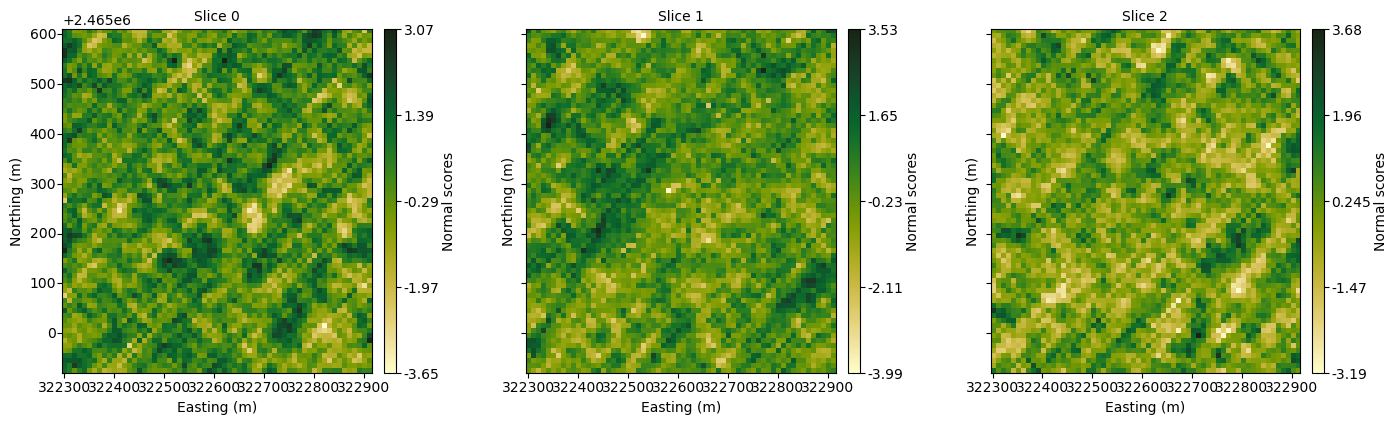

In [57]:
mpl.style.use ('default')
reals_two = []

for i in range (2):
    i = i + 1
    a = gs.DataFile (outdir + 'simulation/real_{}.out'.format (i), griddef = griddef_b880, readfl = True)
    reals_two.append (a)

fig, axes = plt.subplots (1, 3, figsize = (15, 15), sharey = True)

axes = axes.flatten ()

slices = []

for i in range (0, 3):
    slices.append (i)

for ax, i in zip (axes, slices):
    gs.slice_plot (reals_two [0], var = 'value', 
                   orient = 'xy', cmap = 'cmo.speed',  
                   title = 'Slice ' + str(i), 
               cbar_label = 'Normal scores', grid = False, 
                   ax = ax, unit = 'm', slice_number = i, 
                   plot_style = True)

plt.subplots_adjust (left = 0.125, bottom = 0.1, 
                     right = 0.95, top = 0.55, 
                     wspace = 0.50, hspace = 0.4)
plt.savefig (outdir + 'figures/figure_7.png', 
             bbox_inches = 'tight', dpi = 150)

#### Calculate the E-type model

#### Load the `postsim.exe` `GSLIB` program and its parameter file

In [58]:
postsim = gs.Program (program = exedir + 'postsim.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmp0kxubg0t\postsim.par has been copied to the clipboard


In [59]:
postsimpar = """  Parameters for POSTSIM
                  **********************

START OF PARAMETERS:
{datafl}                             - file with realizations
10      1                           - number of realizations, optional column number
-1.0e21   1.0e21                     - trimming limits
{nx}  {ny}   {nz}                    - nx, ny, nz
{output}                             - file for output array(s)
1   0.0                              - output option, output parameter
3  10 11 12                          - if 7,  number of categories, categories
kt3d.out                             - if 10, kriged model to correct to


option 1 = E-type mean and conditional variance
       2 = prob and mean above threshold (par)
       3 = Z-percentile corresponding to (par)
       4 = symmetric (par) probability interval
       6 = prob to be within (par) % of the mean
       7 = summarize categorical variable realizations
      10 = correct to kriged model
"""

postsim.run (parstr = postsimpar.format (datafl = outdir + 'simulation/sgsim.out',
                                        nx = griddef_b880.nx, ny = griddef_b880.ny, 
                                         nz = griddef_b880.nz,
                                        output = './output/simulation/etype.out'), liveoutput = False)

Calling:  ['./exes/postsim.exe', 'temp']


In [60]:
etype = gs.DataFile (outdir + '/simulation/etype.out', griddef = griddef_b880, readfl = True)
etype.head ()

E-type  variance
0  0.511252  0.501674
1  0.413135  0.339269
2  0.341838  0.401719
3  0.157759  1.814068
4  0.464288  0.873328

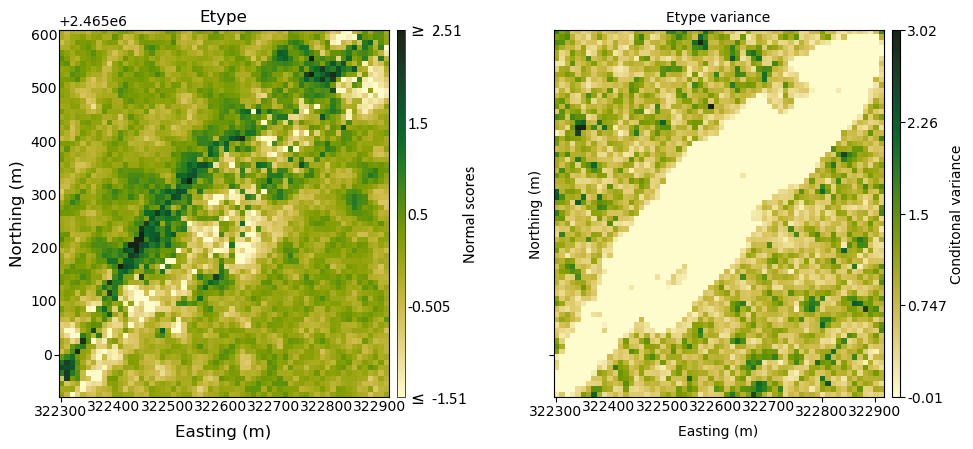

In [61]:
mpl.style.use ('default')
fig, axes = plt.subplots (1, 2, figsize = (10, 10), sharey = True)
axes = axes.flatten ()

gs.slice_plot (etype, var = 'E-type', orient = 'xy', 
               cmap = 'cmo.speed',  title = 'Etype', 
               cbar_label = 'Normal scores', 
               grid = False, ax = axes [0], unit = 'm', 
                  slice_number = 1, vlim = (-1.51, 2.51))
gs.slice_plot (etype, var = 'variance', orient = 'xy', 
               cmap = 'cmo.speed',  title = 'Etype variance', 
               cbar_label = 'Conditonal variance', 
               grid = False, ax = axes [1], unit = 'm', 
                  plot_style = True, slice_number = 1)

plt.subplots_adjust (left = 0.125, bottom = 0.1, 
                     right = 0.95, top = 0.55, wspace = 0.50, 
                     hspace = 0.4)
plt.savefig (outdir + 'figures/figure_9.png', 
             bbox_inches = 'tight', dpi = 150)

In [62]:
sgsim = gs.Program (program = exedir + 'sgsim.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmpdemqraez\sgsim.par has been copied to the clipboard


In [63]:
sgsimpar = """    Parameters for SGSIMv4
                  **********************

START OF PARAMETERS:
{datafl}                            - file with data
2  3  4  5  6  0                    - columns for X,Y,Z,vr,wt,sec.var.
-998.0       1.0e21                 - trimming limits
1                                   - transform the data (0=no, 1=yes)
sgsim.trn                           - file for output trans table
0                                   - consider ref. dist (0=no, 1=yes)
histsmth.out                        - file with ref. dist distribution
1  2                                - columns for vr and wt
0.0    15.0                        - zmin,zmax (for tail extrapolation)
1       0.0                         - lower tail option (1=linear), parameter
1      16.66                        - upper tail option (1=linear), parameter
1                                   - debugging level: 0,1,2,3
sgsim.dbg                           - file for debugging output
{output}                            - file for simulation output
{real}                              - number of realizations to generate
{grid}
59673                               - random number seed
0     40                            - min and max original data for sim
40                                  - number of simulated nodes to use
1                                   - assign data to nodes (0=no, 1=yes)
1     3                             - multiple grid search (0=no, 1=yes),num
0                                   - maximum data per octant (0=not used)
1000.0  100.0  20.0                 - maximum search radii (hmax,hmin,vert)
 90.0   0.0   0.0                   - angles for search ellipsoid
0     0.60   1.0                    - ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC, corr and VRF
nofile                              - file with LVM, EXDR, or COLC variable
1                                   - column for secondary variable
{varmodel}
"""

sgsim.run (parstr = sgsimpar.format (datafl = outdir + '/declus/b880_declus.out', 
                                     output = outdir + '/simulation/sgsim_tr.out',
                                    real = 10, grid = griddef_b880, varmodel = b880_vario_ns), 
           liveoutput = True)

Calling:  ['./exes/sgsim.exe', 'temp']

 SGSIM Version: 4.000

  data file = output//declus/b880_declus.out          
  input columns =            2           3           4           5           6
           0
  trimming limits =   -998.0000      1.0000000E+21
  transformation flag =            1
  transformation file = sgsim.trn                               
  consider smoothed distribution (1=yes) =            0
  file with smoothed distribution = histsmth.out                            
  columns =            1           2
  data limits (tails) =   0.0000000E+00   15.00000    
  lower tail =            1  0.0000000E+00
  upper tail =            1   16.66000    
  debugging level =            1
  debugging file = sgsim.dbg                               
  output file output//simulation/sgsim_tr.out         
  number of realizations =           10
  X grid specification =           62   322301.0       10.00000    
  Y grid specification =           69   2464926.       10.00000    
  

In [64]:
simu_real_tr = gs.DataFile (outdir + '/simulation/sgsim_tr.out', griddef = griddef_b880, readfl = True)
print (simu_real_tr.head ())

      value
0  0.010000
1  0.384000
2  0.366304
3  0.401000
4  0.298559


In [65]:
a = simu_real_tr ['value']

reals_tr = []

for t, x in enumerate (a):
    if t < 201:
        plot_real = t + 1
        real_nodes = griddef_b880.nx * griddef_b880.ny * griddef_b880.nz
        i = real_nodes * (plot_real - 1)
        j = real_nodes * plot_real
        c = a [i:j]
        reals_tr.append (c)
    else:
        break

cc_tr = []
        
for i in range (11):
    ff = pd.DataFrame (reals_tr [i])
    cc_tr.append (ff)
    
for i, j in zip (range (11), range (11)):
    j = j + 1
    gs.write_gslib (cc_tr [i], outdir + '/simulation/real_tr_{}.out'.format (j))

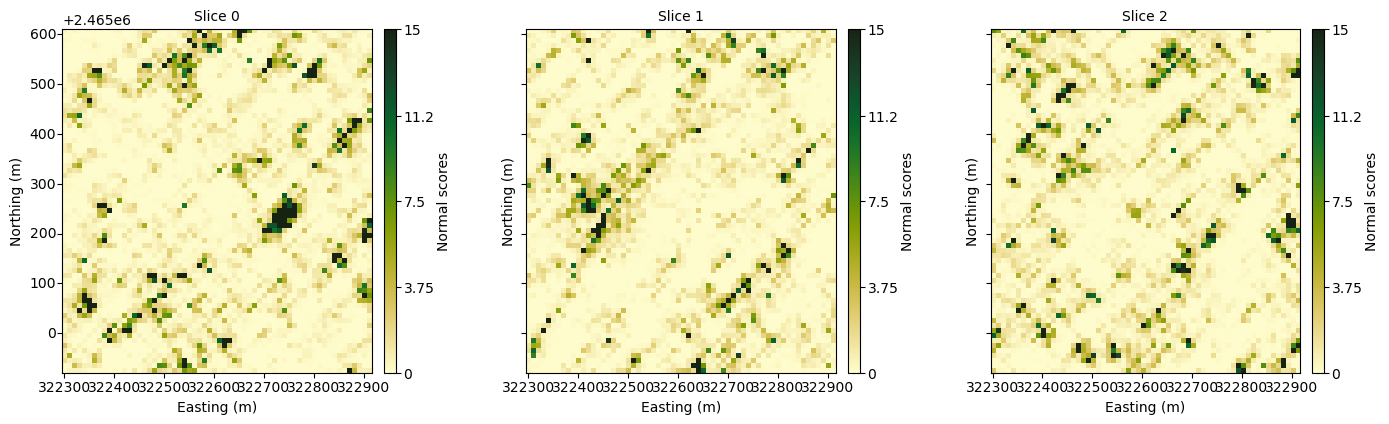

In [66]:
mpl.style.use ('default')
reals_two = []

for i in range (2):
    i = i + 1
    a = gs.DataFile (outdir + 'simulation/real_tr_{}.out'.format (i), griddef = griddef_b880, readfl = True)
    reals_two.append (a)

fig, axes = plt.subplots (1, 3, figsize = (15, 15), sharey = True)

axes = axes.flatten ()

slices = []

for i in range (0, 3):
    slices.append (i)

for ax, i in zip (axes, slices):
    gs.slice_plot (reals_two [0], var = 'value', 
                   orient = 'xy', cmap = 'cmo.speed',  
                   title = 'Slice ' + str(i), 
               cbar_label = 'Normal scores', grid = False, 
                   ax = ax, unit = 'm', slice_number = i, 
                   plot_style = True)

plt.subplots_adjust (left = 0.125, bottom = 0.1, 
                     right = 0.95, top = 0.55, 
                     wspace = 0.50, hspace = 0.4)
plt.savefig (outdir + 'figures/figure_7.png', 
             bbox_inches = 'tight', dpi = 150)

In [67]:
postsim = gs.Program (program = exedir + 'postsim.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmpsw5ih5cz\postsim.par has been copied to the clipboard


In [68]:
postsimpar = """  Parameters for POSTSIM
                  **********************

START OF PARAMETERS:
{datafl}                             - file with realizations
10      1                           - number of realizations, optional column number
-1.0e21   1.0e21                     - trimming limits
{nx}  {ny}   {nz}                    - nx, ny, nz
{output}                             - file for output array(s)
1   0.0                              - output option, output parameter
3  10 11 12                          - if 7,  number of categories, categories
kt3d.out                             - if 10, kriged model to correct to


option 1 = E-type mean and conditional variance
       2 = prob and mean above threshold (par)
       3 = Z-percentile corresponding to (par)
       4 = symmetric (par) probability interval
       6 = prob to be within (par) % of the mean
       7 = summarize categorical variable realizations
      10 = correct to kriged model
"""

postsim.run (parstr = postsimpar.format (datafl = outdir + 'simulation/sgsim_tr.out',
                                        nx = griddef_b880.nx, ny = griddef_b880.ny, 
                                         nz = griddef_b880.nz,
                                        output = './output/simulation/etype_tr.out'), liveoutput = False)

Calling:  ['./exes/postsim.exe', 'temp']


In [69]:
etype_tr = gs.DataFile (outdir + '/simulation/etype_tr.out', griddef = griddef_b880, readfl = True)
etype_tr.head ()

E-type  variance
0  0.493228  0.292565
1  0.532708  0.358536
2  0.517627  0.204596
3  0.637129  0.755326
4  1.157045  4.281258

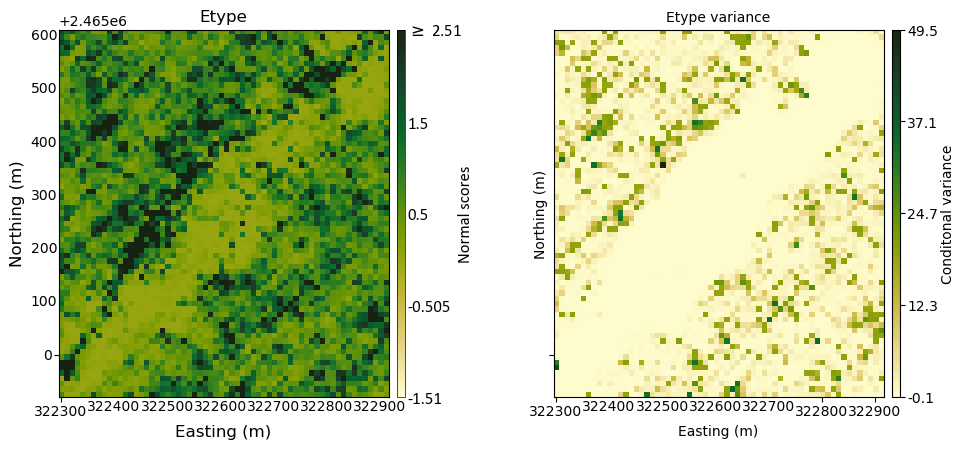

In [70]:
mpl.style.use ('default')
fig, axes = plt.subplots (1, 2, figsize = (10, 10), sharey = True)
axes = axes.flatten ()

gs.slice_plot (etype_tr, var = 'E-type', orient = 'xy', 
               cmap = 'cmo.speed',  title = 'Etype', 
               cbar_label = 'Normal scores', 
               grid = False, ax = axes [0], unit = 'm', 
                  slice_number = 1, vlim = (-1.51, 2.51))
gs.slice_plot (etype_tr, var = 'variance', orient = 'xy', 
               cmap = 'cmo.speed',  title = 'Etype variance', 
               cbar_label = 'Conditonal variance', 
               grid = False, ax = axes [1], unit = 'm', 
                  plot_style = True, slice_number = 1)

plt.subplots_adjust (left = 0.125, bottom = 0.1, 
                     right = 0.95, top = 0.55, wspace = 0.50, 
                     hspace = 0.4)
plt.savefig (outdir + 'figures/figure_9.png', 
             bbox_inches = 'tight', dpi = 150)

# Ordinary Kriging Eastimation for AU Samples at Bench 880 

In [71]:
b880.head()

bh          x           y      z     au  Data Spacing (m)
0  1.0  322451.28  2465152.40  877.5  0.084          2.937344
1  2.0  322453.46  2465150.29  877.5  0.103          2.871697
2  3.0  322455.54  2465148.16  877.5  0.044          2.929401
3  4.0  322457.66  2465146.03  877.5  0.096          2.978882
4  5.0  322406.75  2465090.89  877.5  0.321          4.360733

<Axes: xlabel='au', ylabel='Frequency'>

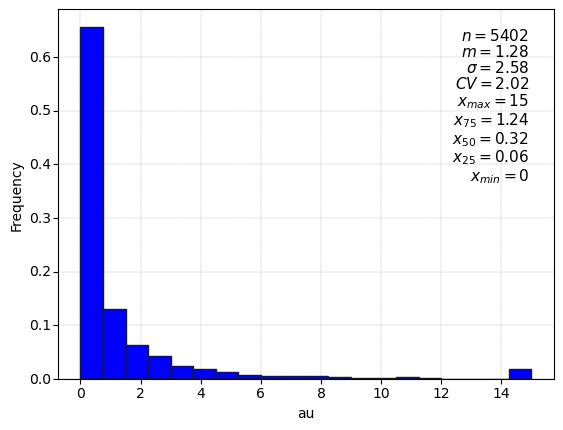

In [72]:
gs.histogram_plot (b880, var = 'au', 
                     icdf = False, color = 'blue',stat_fontsize = 11, grid = True, plot_style = True)

### Clalculate Experimental Variogram for AU Samples 

In [73]:
varcalc = gs.Program (program = exedir + 'varcalc', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmpwuhmmnbq\varcalc.par has been copied to the clipboard


In [74]:
varcalcpar = """  Parameters for VARCALC
                  **********************
 
START OF PARAMETERS:
./datafiles/b_880.out                     - file with data
2   3   4                                       - columns for X, Y, Z coordinates
1   5   0                                       - number of variables,column numbers (position used for tail,head variables below)
-998.0    1.0e21                                - trimming limits
3                                               - number of directions
45  22.5 9999 0.0 0.0 5.0 0.0                 - Major: azm,azmtol,bandhorz,dip,diptol,bandvert,tilt
30  10  35                                    - number of lags,lag distance,lag tolerance
135.0 22.5 999 0.0 0.0 5.0 0.0                 - Minor: azm,azmtol,bandhorz,dip,diptol,bandvert,tilt
30  10  35                                     - number of lags,lag distance,lag tolerance
0.0 0.0 999 -90.0 0.0 5.0 0.0                 - Minor: azm,azmtol,bandhorz,dip,diptol,bandvert,tilt
30 10   5                                    - number of lags,lag distance,lag tolerance
./output/experimental/exp1_var_b880_au.out     - file for experimental variogram points output.
0                                               - legacy output (0=no, 1=write out gamv2004 format)
1                                               - run checks for common errors
1                                               - standardize sills? (0=no, 1=yes)
1                                               - number of variogram types
1   1   1   ?                                   - tail variable, head variable, variogram type (and cutoff/category), sill




NOTES ON VARIOGRAM CALCULATION:
1) By default, varcalc runs checks for common errors in parameter choices. This can be
   disabled if desired. 
2) Varcalc can standardize using a provided sill (such as a declustered variance).
   For example, if variable 1 has a declustered variance of 8.6, the traditional
   semivariogram could be standardized by setting the variogram type to:
      1  1  1  8.6
   Alternatively, varcalc can attempt to infer a sill for standardizing by setting
   the variogram type to:
      1  1  1  ?
   The calculated sills will be written to the console. 
3) Variogram types are the same as in GSLIB:
      1 = traditional semivariogram
      2 = traditional cross semivariogram
      3 = covariance   (-3 calculates variance (provided sill) -covariance)
      4 = correlogram  (-4 calculates 1-correlation)
      5 = general relative semivariogram
      6 = pairwise relative semivariogram
      7 = semivariogram of logarithms
      8 = semimadogram
      9 = indicator semivariogram - continuous  - requires a cutoff
      10= indicator semivariogram - categorical - requires a category
4) For indicator variograms, the variogram cutoff/categories are specified immediately after the variogram type
    1   1   9   1.0   ?               -tail variable, head variable, variogram type (and cutoff/category), sill
5) If desired, the program can write out the variogram points in the gamv2004 style
   for compatibility with older versions. Tilt was not supported in pre-varcalc experimental variogram
   programs so use carefully. 
"""

varcalc.run (parstr = varcalcpar, liveoutput = False)



Calling:  ['./exes/varcalc', 'temp']


In [75]:
exp_var_b880_au = gs.DataFile (outdir + 'experimental/exp1_var_b880_au.out')
exp_var_b880_au.data

Variogram Index  Lag Distance  Number of Pairs  Variogram Value  \
0               1.0     23.019419         125321.0         0.757458   
1               1.0     29.470508         201439.0         0.800964   
2               1.0     35.795068         291123.0         0.838860   
3               1.0     42.280881         397593.0         0.868161   
4               1.0     48.869169         513343.0         0.893053   
5               1.0     56.615814         622526.0         0.919637   
6               1.0     65.291018         721421.0         0.938016   
7               1.0     74.406767         813429.0         0.952495   
8               1.0     83.777671         900876.0         0.960526   
9               1.0     93.196168         982967.0         0.964322   
10              1.0    102.856145        1058103.0         0.968395   
11              1.0    112.509191        1128629.0         0.973316   
12              1.0    122.183253        1195288.0         0.975273   
13              1.0    131.883574        1256492.0         0.979069   
14              1.0    141.630545        1312402.0         0.981127   
15              1.0    151.455412        1363232.0         0.985042   
16              1.0    161.273604        1410613.0         0.988573   
17              1.0    171.106209        1450680.0         0.989161   
18              1.0    180.927394        1486480.0         0.987040   
19              1.0    190.785312        1518299.0         0.983163   
20              1.0    200.619758        1544792.0         0.977383   
21              1.0    210.443035        1565023.0         0.972306   
22              1.0    220.278152        1578133.0         0.967904   
23              1.0    230.185493        1588331.0         0.961658   
24              1.0    240.090192        1595643.0         0.954429   
25              1.0    249.995418        1598334.0         0.950599   
26              1.0    259.939533        1596263.0         0.949490   
27              1.0    269.898650        1592763.0         0.952030   
28              1.0    279.841688        1587717.0         0.954606   
29              1.0    289.703041        1578789.0         0.960604   
30              1.0    299.586149        1563966.0         0.968074   
31              2.0     22.402445         107642.0         0.909004   
32              2.0     28.441229         163456.0         0.922486   
33              2.0     34.185316         222786.0         0.961707   
34              2.0     39.736391         283710.0         0.984627   
35              2.0     45.468406         340887.0         0.965208   
36              2.0     52.598450         381258.0         0.959480   
37              2.0     60.995722         403108.0         0.957328   
38              2.0     70.295647         415271.0         0.958918   
39              2.0     80.023684         419926.0         0.962826   
40              2.0     89.762530         417973.0         0.973093   
41              2.0     99.283830         408909.0         1.000388   
42              2.0    108.453800         393601.0         1.087667   
43              2.0    117.014605         369873.0         1.214726   
44              2.0    125.061689         337760.0         1.343558   
45              2.0    132.630015         293042.0         1.483778   
46              2.0    139.561469         238691.0         1.610474   
47              2.0    146.189367         183084.0         1.744165   
48              2.0    152.732492         131546.0         1.915465   
49              2.0    159.497125          86324.0         2.103833   
50              2.0    166.372091          50615.0         2.130947   
51              2.0    173.712795          24068.0         1.947445   
52              2.0    182.002728           8231.0         1.156788   
53              2.0    190.456664           2113.0         0.417256   
54              2.0    198.714013            343.0         0.228327   
55              2.0    209.7

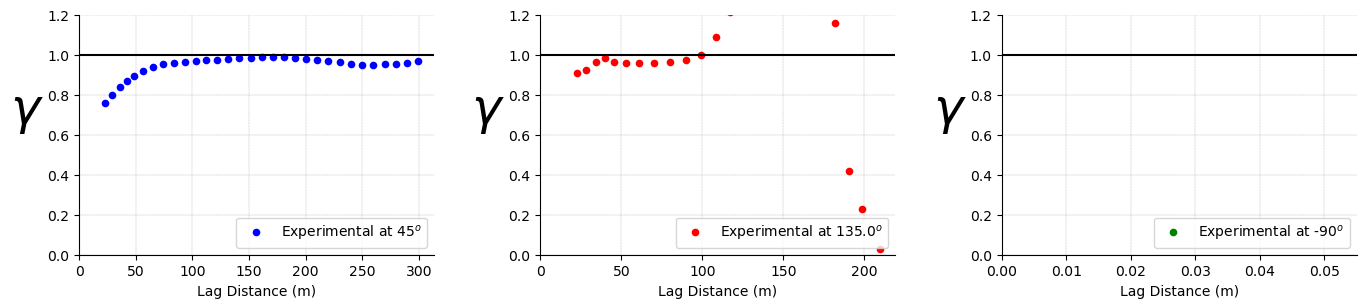

In [76]:
mpl.style.use ('default')
fig, axes = plt.subplots (1, 3, figsize = (7, 3))
axes = axes.flatten ()

lab = ['Experimental at $45^{o}$', 'Experimental at $135.0^{o}$', 'Experimental at -$90^{o}$']
colors = ['blue', 'red', 'green']

for i, ax, j, m in zip (lab, axes, range (3), colors):
    j = j + 1
    gs.variogram_plot (exp_var_b880_au.data, index = j,  
                       grid = True, 
                       color = m, minpairs = True, label = i, 
                       experimental = True, 
                        ax = ax, axis_xy = True, unit = 'm', 
                       ms = 5.5, pairnumbers = False)
    ax.legend (loc = 4, fontsize = 10)
    ax.xaxis.label.set_size (10)

fig.tight_layout ()

plt.subplots_adjust (left = 0.125, bottom = 0.1, 
                     right = 1.95, top = 0.9, wspace = 0.3, 
                     hspace = 0.55)

plt.savefig (outdir + 'figures/figure_3.png', 
             bbox_inches = 'tight', dpi = 150)

In [77]:
varmodel = gs.Program (program = exedir + 'varmodel', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmpuhoz2er6\varmodel.par has been copied to the clipboard


In [78]:
varmodelpar = """ Parameters for VARMODEL
                  ***********************
 
START OF PARAMETERS:
{output}                                      - file for modeled variogram points output
3                                             - number of directions to model points along
  45.0 0.0  5500   0.5                        - azm, dip, npoints, point separation
  135.0 0.0  5500   0.5                       - azm, dip, npoints, point separation
  0.0  90.0  180   0.5                        - azm, dip, npoints, point separation
2    0.6                                      - nst, nugget effect
1    0.35  45   0.0   0.0                    - it,cc,ang1,ang2,ang3
       80  40.0  0.01                    - a_hmax, a_hmin, a_vert
1    0.05 45   0.0   0.0                    - it,cc,ang1,ang2,ang3
       1000.0 1000.0 0.03                        - a_hmax, a_hmin, a_vert
0   100000                                    - fit model (0=no, 1=yes), maximum iterations
1.0                                           - variogram sill (can be fit, but not recommended in most cases)
1                                             - number of experimental files to use
varcalc.out                                   - experimental output file 1
2   1   4                                     - # of variograms (<=0 for all), variogram #s
1   1   10                                    - # pairs weighting, inverse distance weighting, min pairs
0     10.0                                    - fix Hmax/Vert anis. (0=no, 1=yes)
0      1.0                                    - fix Hmin/Hmax anis. (0=no, 1=yes)
varmodelfit.var                               - file to save fit variogram model



NOTES ON VARIOGRAM FITTING:
1) This program can be run as the GSLIB program vmodel where an already
   fit variogram model is provided. 
2) Alternatively, a variogram model can be fit. Any parameter, except
   the number of structures can be fit. Fitting variogram angles
   is NOT recommended best practice. Options for fitting are:
   ? - fit the parameter with no constraints
   a:b - fit the parameter between a and b
   a: - fit the parameter so it is >=a
   :b - fit the parameter so it is <=b
   There must be no spaces in a:b!
3) Structure types (it) are:
   1 - spherical variogram model
   2 - exponential variogram model
   3 - gaussian variogram model
   4 - hole effect variogram model (cannot be automatically fit)
"""
pars = dict (output = outdir + 'model/varmodel_dirc_b880 _au.out')

varmodel.run (parstr = varmodelpar.format (**pars), 
              liveoutput = False)

varmodel_dirc = gs.DataFile (outdir + 'model/varmodel_dirc_b880 _au.out', readfl = True)
varmodel_dirc.head ()

Calling:  ['./exes/varmodel', 'temp']


Variogram Index  Lag Distance  Number of Pairs  Variogram Value  \
0              1.0           0.5              1.0         0.603319   
1              1.0           1.0              1.0         0.606637   
2              1.0           1.5              1.0         0.609955   
3              1.0           2.0              1.0         0.613272   
4              1.0           2.5              1.0         0.616588   

   Variogram Number  Calculation Azimuth  Calculation Dip  
0               1.0                 45.0              0.0  
1               1.0                 45.0              0.0  
2               1.0                 45.0              0.0  
3               1.0                 45.0              0.0  
4               1.0                 45.0              0.0

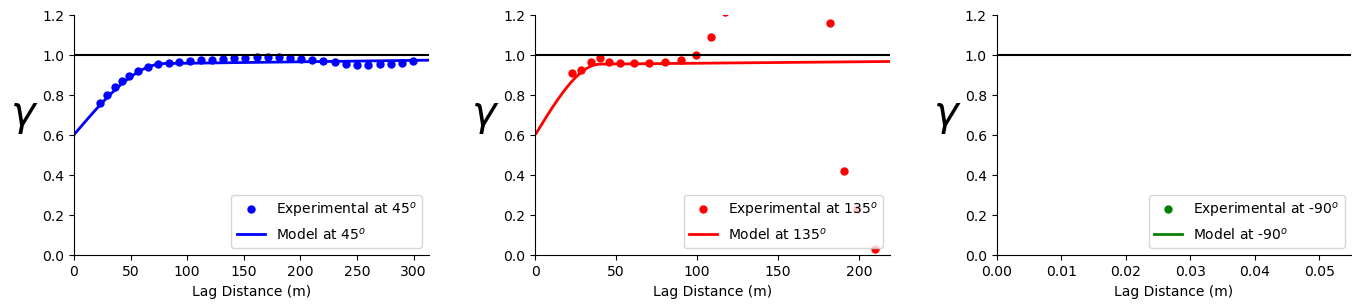

In [79]:
mpl.style.use ('default')
fig, axes = plt.subplots (1, 3, figsize = (7, 3))
axes = axes.flatten ()
lab = ['Experimental at $45^{o}$', 'Experimental at $135^{o}$', 'Experimental at -$90^{o}$']
lab_2 = ['Model at $45^{o}$', 'Model at $135^{o}$', 'Model at -$90^{o}$']
colors = ['blue', 'red', 'green']

for i, ax, j, k, d in zip (lab, axes, range (3), lab_2, colors):
    j = j + 1
    gs.variogram_plot (exp_var_b880_au.data, index = j,   
                             color = d, minpairs = False, 
                             label = i, experimental = True, 
                             ax = ax, axis_xy = True, unit = 'm', 
                             ms = 5, plot_style = True)
    
    gs.variogram_plot (varmodel_dirc.data, index = j, sill = False, 
                             label = k, experimental = False, 
                             ax = ax, axis_xy = True, unit = 'm', 
                             ms = 0, lw = 2, color = d, 
                             plot_style = True)
    ax.legend (loc = 4, fontsize = 10)
    ax.xaxis.label.set_size (10)

fig.tight_layout ()
plt.subplots_adjust (left = 0.125, bottom = 0.1, right = 1.95, top = 0.9, wspace = 0.3, hspace = 0.55)
plt.savefig (outdir + 'figures/figure_10.png', bbox_inches = 'tight', dpi = 150)

#### Save the parameters of the model fitted to the experimental variogram of the Au grades
#### The model given in the following cell will be used as a structural model required by the kriging program.

In [80]:
b880_au_vario ='''2    0.6                                      - nst, nugget effect
1    0.35  45   0.0   0.0                    - it,cc,ang1,ang2,ang3
       80  40.0  0.01                    - a_hmax, a_hmin, a_vert
1    0.05 45   0.0   0.0                    - it,cc,ang1,ang2,ang3
       1000.0 1000.0 0.03                        - a_hmax, a_hmin, a_vert'''
print (b880_au_vario)

2    0.6                                      - nst, nugget effect
1    0.35  45   0.0   0.0                    - it,cc,ang1,ang2,ang3
       80  40.0  0.01                    - a_hmax, a_hmin, a_vert
1    0.05 45   0.0   0.0                    - it,cc,ang1,ang2,ang3
       1000.0 1000.0 0.03                        - a_hmax, a_hmin, a_vert


# OK Estimation

#### Load the `kt3dn.exe` `GSLIB` program and its parameter file

In [82]:
blksize = (10, 10, 5)
griddef_b880 = b880.infergriddef (blksize)
griddef_b880

Pygeostat GridDef:
62 322301.0 10.0 
69 2464926.0 10.0 
3 874.5 5.0

In [83]:
kt3dn = gs.Program (program = exedir + 'kt3dn.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmpkuqbfkta\kt3dn.par has been copied to the clipboard


In [84]:
start_workflow_time = time.time()

kt3dnpar = """   Parameters for KT3DN
                 ********************
START OF PARAMETERS:
{datafl}                         - file with data
1  2  3  4  5  0                 - columns for DH,X,Y,Z,var,sec var
-998.0    1.0e21                 - trimming limits
0                                - option: 0=grid, 1=cross, 2=jackknife
nofile                           - file with jackknife data
1   2   0    3    0              - columns for X,Y,Z,vr and sec var
nofile                           - data spacing analysis output file (see note)
0    15.0                        - number to search (0 for no dataspacing analysis, rec. 10 or 20) and composite length
0    100   0                     - debugging level: 0,3,5,10; max data for GSKV;output total weight of each data?(0=no,1=yes)
nofile                           - file for debugging output (see note)
{output}                         - file for kriged output (see GSB note)
{grid}
3    3      3                    - x,y and z block discretization
0     25    12    1              - min, max data for kriging,upper max for ASO,ASO incr
0      0                         - max per octant, max per drillhole (0-> not used)
80.0  40.0  5.0                  - maximum search radii
 45.0   0.0   0.0                 - angles for search ellipsoid
1                                 - 0=SK,1=OK,2=LVM(resid),3=LVM((1-w)*m(u))),4=colo,5=exdrift,6=ICCK
0.0   0.0  0.0                    - mean (if 0,4,5,6), corr. (if 4 or 6), var. reduction factor (if 4)
0 0 0 0 0 0 0 0 0                - drift: x,y,z,xx,yy,zz,xy,xz,zy
0                                - 0, variable; 1, estimate trend
nofile                           - gridded file with drift/mean
4                                - column number in gridded file
nofile                           - gridded file with keyout (see note)
0    1                           - column (0 if no keyout) and value to keep
{varmodel}

Data spacing analysis explained:
The approximate data spacing (given a number of neighbours to use
and composite length for 3D kriging) is calculated as well as the distance to the nearest
neighbour. Results are summarized in the data spacing output file.

GSB explained:
Input and output grid files may be binary when running the program in grid mode.
This includes the optonal external and keyout files, as well as the output file. The program
assumes that a file is formatted as GSLIB-style binary (GSB) if a .gsb extension is detected.

Debugging levels explained:
0: no debugging output
3: get extra kriging information
5: get the above + GSK variance
10: get the above + kriging matrix info
Note1: idbg>=5 may involve a long run time
Note2: GSKV calculation uses search radius

Auto Search Optimization (ASO) explained:
Set min data for kriging to the negative of value
         ie: for min data = 2, set min data to -2
max data is then the lower limit for number of data
Provide a upper limit and increment
         ie: -4  8  12  1 means that
         4 is the min data for kriging
         and kriging will be performed with a max of 
         8, 9, 10, 11 and 12 data sequentially
The outputs are output as realizations from 
the lower limit to the upper limit (similar to SGSIM)

Keyout explained:
A keyout variable, matching the dimensions of the output grid, may be used to specify
whether each location should be estimated (value to keep) or unestimated (everything else). 
This has the potential to substatially increase execution speed when only interested in an
irregular sub-volume of the modeling grid. 

Invdist option explained:
Set nst to -1 for inverse distance
Inverse distance estimates are calculated with the anisotropy/angle information and weights as:
 weight(i)*=1/(h+c0(1))^(cc(1))
The ID weights are then scaled to sum to 1
"""
kt3dn.run (parstr = kt3dnpar.format (datafl = datadir + 'b_880.out', 
                                     grid = griddef_b880,
                                    output = outdir + '/estimation/kt3dn_b880.out',
                                    varmodel = b880_au_vario), liveoutput = False)

Calling:  ['./exes/kt3dn.exe', 'temp']


In [85]:
Ok_estim = gs.DataFile (outdir + '/estimation/kt3dn_b880.out', 
                        griddef = griddef_b880, readfl = True)
Ok_estim.head (n = 5)

Estimate  EstimationVariance
0  0.210695            0.438096
1  0.162935            0.434080
2  0.184026            0.433308
3  0.096740            0.419047
4  0.088697            0.398959

#### Display Slices

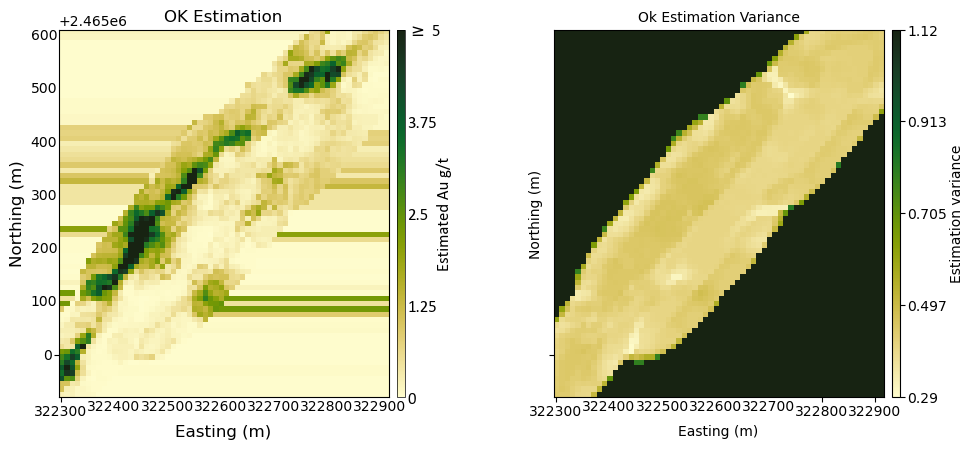

In [86]:
mpl.style.use ('default')
fig, axes = plt.subplots (1, 2, figsize = (10, 10), sharey = True)
axes = axes.flatten ()

gs.slice_plot (Ok_estim, var = 'Estimate', orient = 'xy', 
               cmap = 'cmo.speed',  title = 'OK Estimation', 
               cbar_label = 'Estimated Au g/t', 
               grid = False, ax = axes [0], unit = 'm', 
                  slice_number = 1, vlim = (0, 5))
gs.slice_plot (Ok_estim, var = 'EstimationVariance', orient = 'xy', 
               cmap = 'cmo.speed',  title = 'Ok Estimation Variance', 
               cbar_label = 'Estimation variance', 
               grid = False, ax = axes [1], unit = 'm', 
                  plot_style = True, slice_number = 1)

plt.subplots_adjust (left = 0.125, bottom = 0.1, 
                     right = 0.95, top = 0.55, wspace = 0.50, 
                     hspace = 0.4)
plt.savefig (outdir + 'figures/figure_9.png', 
             bbox_inches = 'tight', dpi = 150)

#### Cross Validation

In [87]:
kt3dn = gs.Program (program = exedir + 'kt3dn.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmp8bur30rd\kt3dn.par has been copied to the clipboard


In [88]:
kt3dnpar = """   Parameters for KT3DN
                 ********************
START OF PARAMETERS:
{datafl}                         - file with data
1  2  3  4  5  0                 - columns for DH,X,Y,Z,var,sec var
-998.0    1.0e21                 - trimming limits
1                                - option: 0=grid, 1=cross, 2=jackknife
nofile                           - file with jackknife data
1   2   0    3    0              - columns for X,Y,Z,vr and sec var
nofile                           - data spacing analysis output file (see note)
0    15.0                        - number to search (0 for no dataspacing analysis, rec. 10 or 20) and composite length
0    100   0                     - debugging level: 0,3,5,10; max data for GSKV;output total weight of each data?(0=no,1=yes)
nofile                           - file for debugging output (see note)
{output}                         - file for kriged output (see GSB note)
{grid}
3    3      3                    - x,y and z block discretization
0    25    12    1               - min, max data for kriging,upper max for ASO,ASO incr
0      0                         - max per octant, max per drillhole (0-> not used)
1000.0  1000.0  30.0             - maximum search radii
 0.0   0.0   0.0                 - angles for search ellipsoid
1                                - 0=SK,1=OK,2=LVM(resid),3=LVM((1-w)*m(u))),4=colo,5=exdrift,6=ICCK
0.0  0.0  0.0                    - mean (if 0,4,5,6), corr. (if 4 or 6), var. reduction factor (if 4)
0 0 0 0 0 0 0 0 0                - drift: x,y,z,xx,yy,zz,xy,xz,zy
0                                - 0, variable; 1, estimate trend
nofile                           - gridded file with drift/mean
4                                - column number in gridded file
nofile                           - gridded file with keyout (see note)
0    1                           - column (0 if no keyout) and value to keep
{varmodel}

Data spacing analysis explained:
The approximate data spacing (given a number of neighbours to use
and composite length for 3D kriging) is calculated as well as the distance to the nearest
neighbour. Results are summarized in the data spacing output file.

GSB explained:
Input and output grid files may be binary when running the program in grid mode.
This includes the optonal external and keyout files, as well as the output file. The program
assumes that a file is formatted as GSLIB-style binary (GSB) if a .gsb extension is detected.

Debugging levels explained:
0: no debugging output
3: get extra kriging information
5: get the above + GSK variance
10: get the above + kriging matrix info
Note1: idbg>=5 may involve a long run time
Note2: GSKV calculation uses search radius

Auto Search Optimization (ASO) explained:
Set min data for kriging to the negative of value
         ie: for min data = 2, set min data to -2
max data is then the lower limit for number of data
Provide a upper limit and increment
         ie: -4  8  12  1 means that
         4 is the min data for kriging
         and kriging will be performed with a max of 
         8, 9, 10, 11 and 12 data sequentially
The outputs are output as realizations from 
the lower limit to the upper limit (similar to SGSIM)

Keyout explained:
A keyout variable, matching the dimensions of the output grid, may be used to specify
whether each location should be estimated (value to keep) or unestimated (everything else). 
This has the potential to substatially increase execution speed when only interested in an
irregular sub-volume of the modeling grid. 

Invdist option explained:
Set nst to -1 for inverse distance
Inverse distance estimates are calculated with the anisotropy/angle information and weights as:
 weight(i)*=1/(h+c0(1))^(cc(1))
The ID weights are then scaled to sum to 1
"""
kt3dn.run (parstr = kt3dnpar.format (datafl = datadir + 'b_880.out', 
                                     grid = griddef_b880,
                                    output = outdir + '/cross_val/kt3dn_ok_b880.out',
                                    varmodel = b880_au_vario), liveoutput = False)

Calling:  ['./exes/kt3dn.exe', 'temp']


In [89]:
Ok_cross = gs.DataFile (outdir + '/cross_val/kt3dn_ok_b880.out', 
                        griddef = griddef_b880, readfl = True)
Ok_cross.head (n = 5)

X          Y      Z   True  Estimate  EstimationVariance  \
0  322451.28  2465152.4  877.5  0.084  0.643621            0.229101   
1  322453.46  2465150.3  877.5  0.103  0.809523            0.227525   
2  322455.54  2465148.2  877.5  0.044  0.580669            0.224601   
3  322457.66  2465146.0  877.5  0.096  0.567866            0.221861   
4  322406.75  2465090.9  877.5  0.321  0.356244            0.212638   

   Error: est-true  
0         0.559621  
1         0.706523  
2         0.536669  
3         0.471866  
4         0.035244

In [90]:
scatxval = gs.Program (program = exedir + 'scatxval.exe', getpar = True)

C:\Users\hugh\Documents\applied statistics\CPAG23_Project_NadirElnour\SIMULATION BLASTHOLE\tmps4pkwos0\scatxval.par has been copied to the clipboard


In [91]:
scatxvalpar = """ Parameters for SCATXVAL
                  ***********************

START OF PARAMETERS:
{datafl}                          - file with cross validation results
4   5   0                         - columns for true, estimate, ID
-1.0e21   1.0e21                  - trimming limits
{output}                          - file for Postscript output
0                                 - 0=continuous, 1=categorical
0.0 16.66    0                    - minimum, maximum, (0=arith, 1=log)
10                                - number of worst estimates to show
No cut off                        - cutoff value (outside range for missing)
"""

scatxval.run ( parstr = scatxvalpar.format (datafl = outdir + '/cross_val/kt3dn_ok_b880.out',
                                               output = outdir + '/cross_val/cross_b880.ps'), liveoutput = False)

Calling:  ['./exes/scatxval.exe', 'temp']


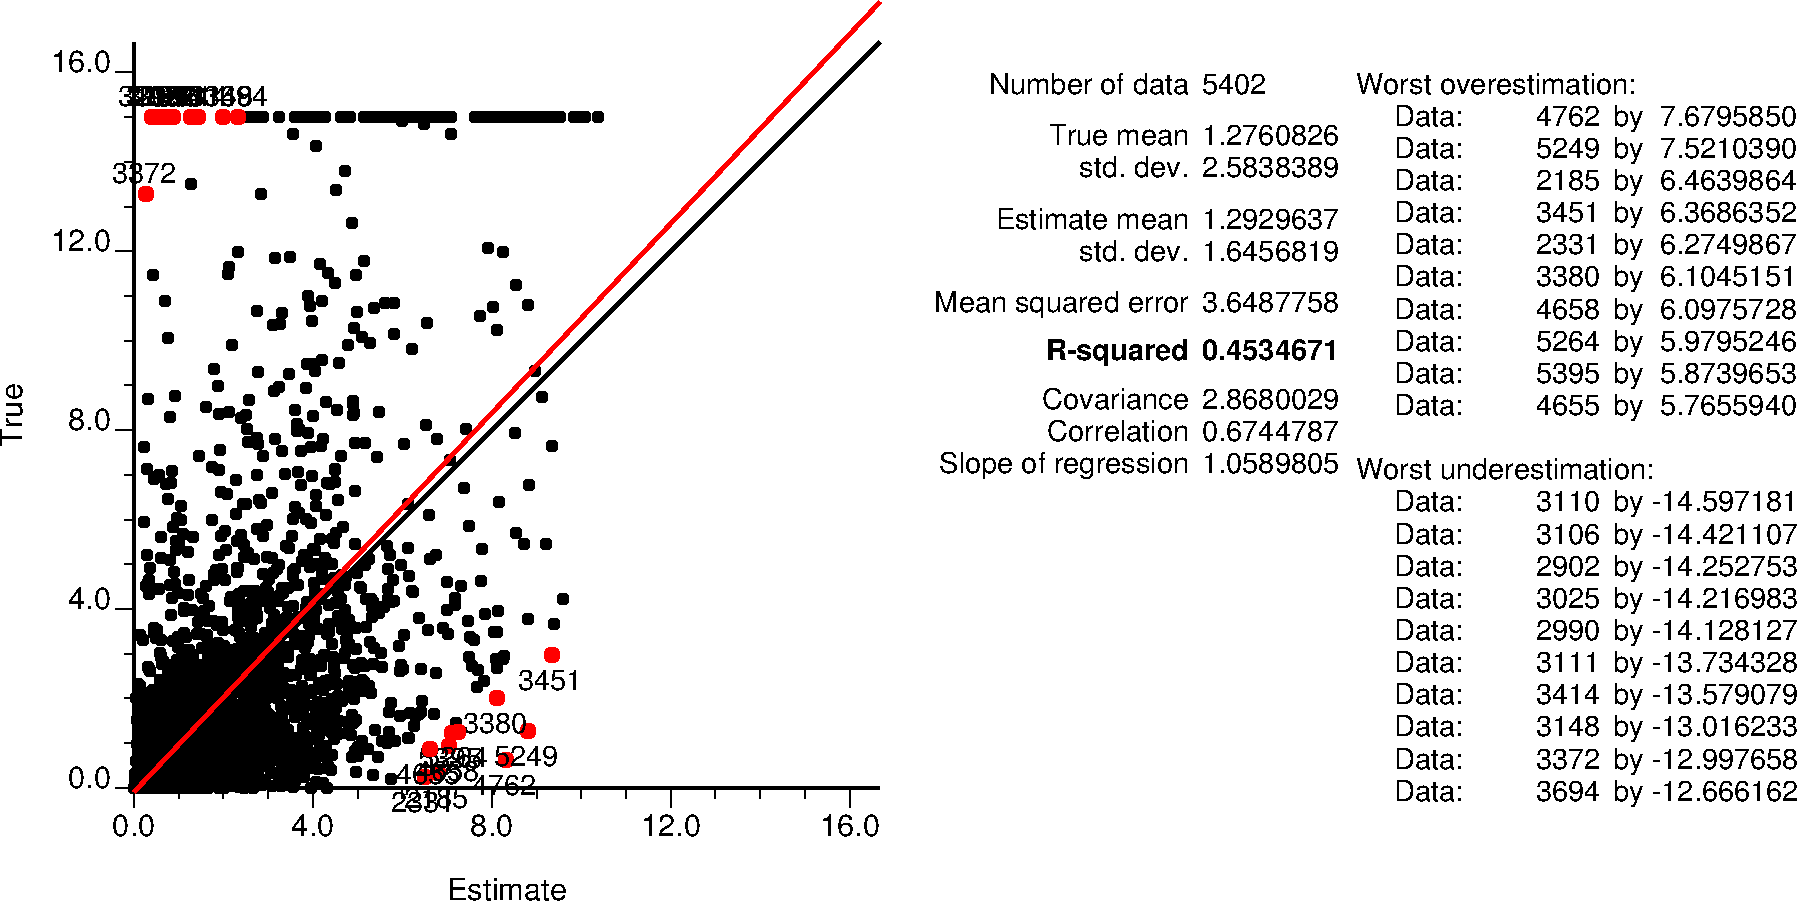

In [92]:
DisplayPostscript (outdir + '/cross_val/cross_b880.ps')

## Display the etype model and OK estimate

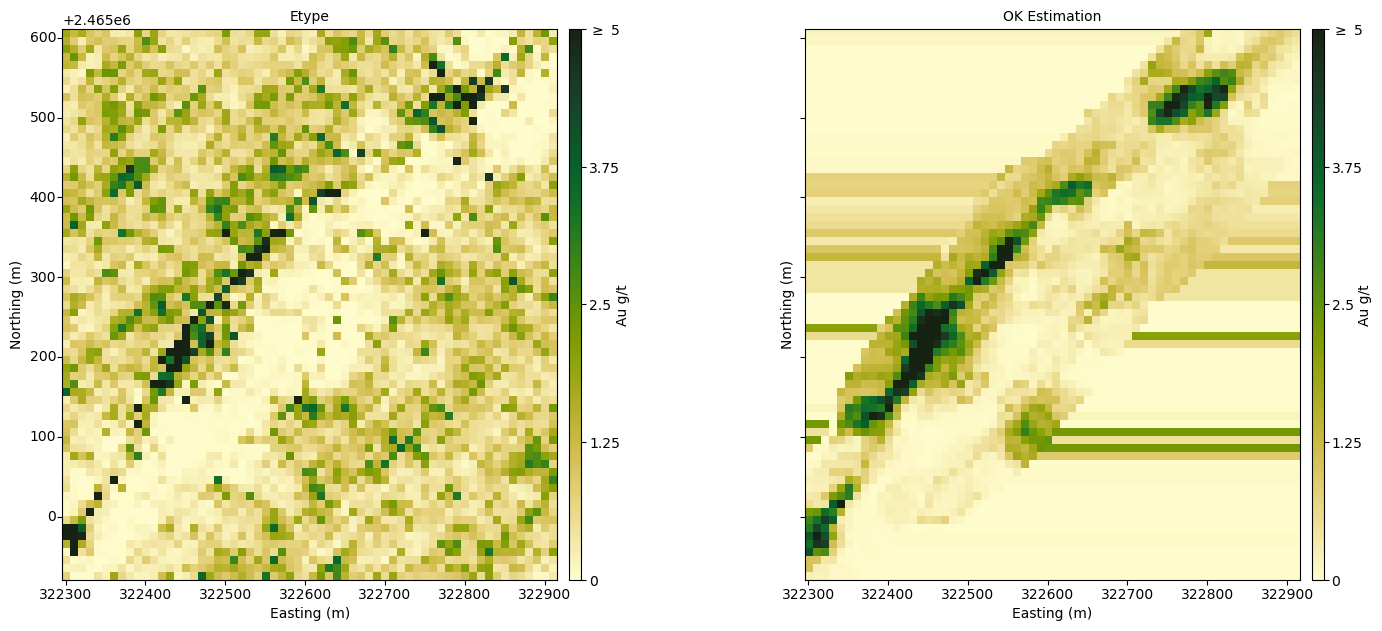

In [93]:
mpl.style.use ('default')
fig, axes = plt.subplots (1, 2, figsize = (15, 15), sharey = True)

axes = axes.flatten ()

gs.slice_plot (etype_tr, var = 'E-type', orient = 'xy', cmap = 'cmo.speed',  title = 'Etype', 
               cbar_label = 'Au g/t', grid = False, ax = axes [0], unit = 'm', 
                  slice_number = 1,vlim = (0, 5), plot_style = True)
gs.slice_plot (Ok_estim, var = 'Estimate', orient = 'xy', cmap = 'cmo.speed',  title = 'OK Estimation', 
               cbar_label = 'Au g/t', grid = False, ax = axes [1], unit = 'm', 
                   slice_number = 1, vlim = (0, 5), plot_style = True)

plt.subplots_adjust (left = 0.125, bottom = 0.1, right = 0.95, top = 0.55, wspace = 0.50, hspace = 0.4)

plt.savefig (outdir + 'figures/figure_12.png', bbox_inches = 'tight', dpi = 150)